#### Predicting the Forest Fire

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import os
import pandas as pd

# Directory containing CSV files
directory = 'C:/New folder/vs code programs/Forest Fire/1_Completed Codes/Datasets'

# List to store DataFrames from each CSV
dfs = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        # Read CSV file into a DataFrame and append to the list
        dfs.append(pd.read_csv(filepath))

# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

# Export combined DataFrame to a single CSV file
combined_df.to_csv('combined_file.csv', index=False)

In [6]:
df=combined_df

In [7]:
df.sample(5)

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
71042     28.6602    80.1510       330.2   1.1    1.0  2003-04-07       801   
375472    28.2844    79.0925       304.7   1.3    1.1  2008-01-26       746   
210276    30.4203    76.1235       317.0   1.2    1.1  2005-10-10       820   
521951    34.0538    74.9995       312.3   1.1    1.0  2009-10-29       559   
1010383   24.0601    92.5223       372.1   1.4    1.2  15-03-2016       727   

        satellite instrument  confidence  version  bright_t31    frp daynight  \
71042        Aqua      MODIS          76      6.2       312.0   19.0        D   
375472       Aqua      MODIS          59      6.2       293.6    5.4        D   
210276       Aqua      MODIS          49      6.2       300.8    8.1        D   
521951      Terra      MODIS          69      6.2       291.9    9.3        D   
1010383      Aqua      MODIS         100      6.2       301.0  192.0        D   

         type  
71042       0  
375472      0  
210276      0  
521951      0  
1010383     0

In [8]:
df.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   23.6805    86.0949       318.9   1.2    1.1  2000-11-01       501   
1   22.7913    86.2102       326.4   1.2    1.1  2000-11-01       501   
2   22.7885    86.2037       320.7   1.2    1.1  2000-11-01       501   
3   22.7870    86.2150       319.7   1.2    1.1  2000-11-01       501   
4   18.7651    79.9640       315.9   2.7    1.6  2000-11-01       503   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          67      6.2       303.3  12.1        D     2  
1     Terra      MODIS          54      6.2       299.4  19.8        D     0  
2     Terra      MODIS          65      6.2       299.1  15.0        D     0  
3     Terra      MODIS          66      6.2       298.5  13.8        D     0  
4     Terra      MODIS          18      6.2       298.3  28.8        D     0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517093 entries, 0 to 1517092
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   latitude    1517093 non-null  float64
 1   longitude   1517093 non-null  float64
 2   brightness  1517093 non-null  float64
 3   scan        1517093 non-null  float64
 4   track       1517093 non-null  float64
 5   acq_date    1517093 non-null  object 
 6   acq_time    1517093 non-null  int64  
 7   satellite   1517093 non-null  object 
 8   instrument  1517093 non-null  object 
 9   confidence  1517093 non-null  int64  
 10  version     1517093 non-null  float64
 11  bright_t31  1517093 non-null  float64
 12  frp         1517093 non-null  float64
 13  daynight    1517093 non-null  object 
 14  type        1517093 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 173.6+ MB


In [10]:
df.nunique()

latitude      210252
longitude     211984
brightness      1922
scan              39
track             11
acq_date        7576
acq_time         701
satellite          2
instrument         1
confidence       101
version            2
bright_t31       761
frp             9874
daynight           2
type               4
dtype: int64

In [11]:
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [12]:
# Convert 'date' column to datetime format
df['acq_date'] = pd.to_datetime(df['acq_date'])

# Extract year, month, and day parts
df['Year'] = df['acq_date'].dt.year
df['Month'] = df['acq_date'].dt.month
df['Day'] = df['acq_date'].dt.day


C:\Users\2248317\AppData\Local\Temp\ipykernel_7888\4197087008.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['acq_date'] = pd.to_datetime(df['acq_date'])


In [13]:
# # split date to day, month and year
# df[["Year", "Month", "Day"]] = df["acq_date"].str.split("-", expand = True)
# df["Year"]= df["Year"].astype(int)
# df["Month"]= df["Month"].astype(int)
# df["Day"]= df["Day"].astype(int)

In [14]:
print(f"{str(df['acq_date'].min())[:10]} to {str(df['acq_date'].max())[:10]}")

2000-11-01 to 2021-12-31


In [15]:
df

latitude  longitude  brightness  scan  track   acq_date  acq_time  \
0         23.6805    86.0949       318.9   1.2    1.1 2000-11-01       501   
1         22.7913    86.2102       326.4   1.2    1.1 2000-11-01       501   
2         22.7885    86.2037       320.7   1.2    1.1 2000-11-01       501   
3         22.7870    86.2150       319.7   1.2    1.1 2000-11-01       501   
4         18.7651    79.9640       315.9   2.7    1.6 2000-11-01       503   
...           ...        ...         ...   ...    ...        ...       ...   
1517088   21.1066    72.6336       307.9   1.5    1.2 2021-12-31      1703   
1517089   19.1224    76.7451       303.2   1.0    1.0 2021-12-31      1703   
1517090   19.2367    76.9620       304.1   1.0    1.0 2021-12-31      1703   
1517091   23.7817    86.3960       306.2   1.2    1.1 2021-12-31      1954   
1517092   20.7973    85.2590       302.6   1.2    1.1 2021-12-31      1955   

        satellite instrument  confidence  version  bright_t31   frp daynight  \
0           Terra      MODIS          67     6.20       303.3  12.1        D   
1           Terra      MODIS          54     6.20       299.4  19.8        D   
2           Terra      MODIS          65     6.20       299.1  15.0        D   
3           Terra      MODIS          66     6.20       298.5  13.8        D   
4           Terra      MODIS          18     6.20       298.3  28.8        D   
...           ...        ...         ...      ...         ...   ...      ...   
1517088     Terra      MODIS          73     6.03       290.5  16.1        N   
1517089     Terra      MODIS          54     6.03       288.0   6.5        N   
1517090     Terra      MODIS          59     6.03       288.2   7.2        N   
1517091      Aqua      MODIS          65     6.03       287.8  10.8        N   
1517092      Aqua      MODIS          50     6.03       289.1   8.4        N   

         type  Year  Month  Day  
0           2  2000     11    1  
1           0  2000     11    1  
2           0  2000     11    1  
3           0  2000     11    1  
4           0  2000     11    1  
...       ...   ...    ...  ...  
1517088     2  2021     12   31  
1517089     0  2021     12   31  
1517090     0  2021     12   31  
1517091     2  2021     12   31  
1517092     2  2021     12   31  

[1517093 rows x 18 columns]

In [16]:
# Sort df based on 'acq_date'
df = df.sort_values(by='acq_date')

# Display sorted df
df

latitude  longitude  brightness  scan  track   acq_date  acq_time  \
0         23.6805    86.0949       318.9   1.2    1.1 2000-11-01       501   
16        21.9091    72.6818       305.3   1.0    1.0 2000-11-01      1735   
14        21.9116    72.7610       302.3   1.0    1.0 2000-11-01      1735   
13        21.9012    72.7529       314.5   1.0    1.0 2000-11-01      1735   
12        21.9026    72.7626       302.9   1.0    1.0 2000-11-01      1735   
...           ...        ...         ...   ...    ...        ...       ...   
1517064   26.6113    94.9166       310.7   4.7    2.0 2021-12-31       746   
1517065   23.7747    86.3892       317.1   1.2    1.1 2021-12-31       746   
1517066   26.9050    88.8812       307.0   1.8    1.3 2021-12-31       746   
1517057   19.1677    83.0918       312.1   1.1    1.0 2021-12-31       744   
1517092   20.7973    85.2590       302.6   1.2    1.1 2021-12-31      1955   

        satellite instrument  confidence  version  bright_t31   frp daynight  \
0           Terra      MODIS          67     6.20       303.3  12.1        D   
16          Terra      MODIS          64     6.20       292.6   7.0        N   
14          Terra      MODIS          48     6.20       292.2   4.9        N   
13          Terra      MODIS          89     6.20       292.5  13.4        N   
12          Terra      MODIS          52     6.20       292.1   5.2        N   
...           ...        ...         ...      ...         ...   ...      ...   
1517064      Aqua      MODIS          67     6.03       287.2  89.5        D   
1517065      Aqua      MODIS          40     6.03       301.0  11.6        D   
1517066      Aqua      MODIS          63     6.03       294.3  11.6        D   
1517057      Aqua      MODIS          63     6.03       298.3   7.5        D   
1517092      Aqua      MODIS          50     6.03       289.1   8.4        N   

         type  Year  Month  Day  
0           2  2000     11    1  
16          0  2000     11    1  
14          2  2000     11    1  
13          2  2000     11    1  
12          2  2000     11    1  
...       ...   ...    ...  ...  
1517064     0  2021     12   31  
1517065     2  2021     12   31  
1517066     0  2021     12   31  
1517057     0  2021     12   31  
1517092     2  2021     12   31  

[1517093 rows x 18 columns]

In [17]:
# Resets the index and drop the existing one
df = df.reset_index(drop=True)
df

latitude  longitude  brightness  scan  track   acq_date  acq_time  \
0         23.6805    86.0949       318.9   1.2    1.1 2000-11-01       501   
1         21.9091    72.6818       305.3   1.0    1.0 2000-11-01      1735   
2         21.9116    72.7610       302.3   1.0    1.0 2000-11-01      1735   
3         21.9012    72.7529       314.5   1.0    1.0 2000-11-01      1735   
4         21.9026    72.7626       302.9   1.0    1.0 2000-11-01      1735   
...           ...        ...         ...   ...    ...        ...       ...   
1517088   26.6113    94.9166       310.7   4.7    2.0 2021-12-31       746   
1517089   23.7747    86.3892       317.1   1.2    1.1 2021-12-31       746   
1517090   26.9050    88.8812       307.0   1.8    1.3 2021-12-31       746   
1517091   19.1677    83.0918       312.1   1.1    1.0 2021-12-31       744   
1517092   20.7973    85.2590       302.6   1.2    1.1 2021-12-31      1955   

        satellite instrument  confidence  version  bright_t31   frp daynight  \
0           Terra      MODIS          67     6.20       303.3  12.1        D   
1           Terra      MODIS          64     6.20       292.6   7.0        N   
2           Terra      MODIS          48     6.20       292.2   4.9        N   
3           Terra      MODIS          89     6.20       292.5  13.4        N   
4           Terra      MODIS          52     6.20       292.1   5.2        N   
...           ...        ...         ...      ...         ...   ...      ...   
1517088      Aqua      MODIS          67     6.03       287.2  89.5        D   
1517089      Aqua      MODIS          40     6.03       301.0  11.6        D   
1517090      Aqua      MODIS          63     6.03       294.3  11.6        D   
1517091      Aqua      MODIS          63     6.03       298.3   7.5        D   
1517092      Aqua      MODIS          50     6.03       289.1   8.4        N   

         type  Year  Month  Day  
0           2  2000     11    1  
1           0  2000     11    1  
2           2  2000     11    1  
3           2  2000     11    1  
4           2  2000     11    1  
...       ...   ...    ...  ...  
1517088     0  2021     12   31  
1517089     2  2021     12   31  
1517090     0  2021     12   31  
1517091     0  2021     12   31  
1517092     2  2021     12   31  

[1517093 rows x 18 columns]

In [18]:
# df.set_index('acq_date', inplace=True, drop=False)
# df.head()

In [19]:
df['acq_date'] = df['acq_date'].astype(str)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517093 entries, 0 to 1517092
Data columns (total 18 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   latitude    1517093 non-null  float64
 1   longitude   1517093 non-null  float64
 2   brightness  1517093 non-null  float64
 3   scan        1517093 non-null  float64
 4   track       1517093 non-null  float64
 5   acq_date    1517093 non-null  object 
 6   acq_time    1517093 non-null  int64  
 7   satellite   1517093 non-null  object 
 8   instrument  1517093 non-null  object 
 9   confidence  1517093 non-null  int64  
 10  version     1517093 non-null  float64
 11  bright_t31  1517093 non-null  float64
 12  frp         1517093 non-null  float64
 13  daynight    1517093 non-null  object 
 14  type        1517093 non-null  int64  
 15  Year        1517093 non-null  int64  
 16  Month       1517093 non-null  int64  
 17  Day         1517093 non-null  int64  
dtypes: float64(8), int64(6

In [21]:
df.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   23.6805    86.0949       318.9   1.2    1.1  2000-11-01       501   
1   21.9091    72.6818       305.3   1.0    1.0  2000-11-01      1735   
2   21.9116    72.7610       302.3   1.0    1.0  2000-11-01      1735   
3   21.9012    72.7529       314.5   1.0    1.0  2000-11-01      1735   
4   21.9026    72.7626       302.9   1.0    1.0  2000-11-01      1735   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  \
0     Terra      MODIS          67      6.2       303.3  12.1        D     2   
1     Terra      MODIS          64      6.2       292.6   7.0        N     0   
2     Terra      MODIS          48      6.2       292.2   4.9        N     2   
3     Terra      MODIS          89      6.2       292.5  13.4        N     2   
4     Terra      MODIS          52      6.2       292.1   5.2        N     2   

   Year  Month  Day  
0  2000     11    1  
1  2000     11    1  
2  2000     11    1  
3  2000     11    1  
4  2000     11    1

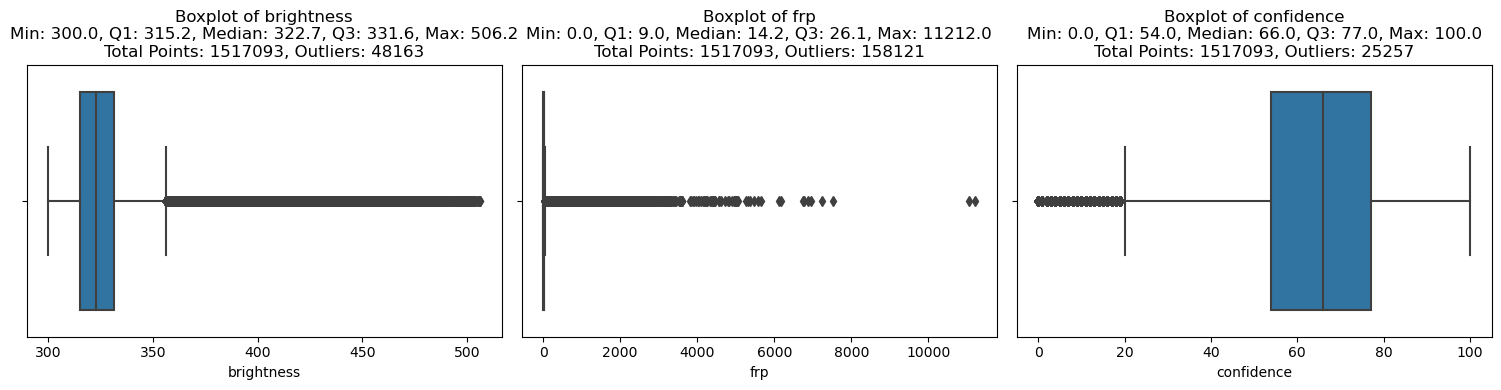

Total Points: 4551279
Total Outliers: 231541


In [22]:
columns_of_interest = ['brightness', 'frp', 'confidence']

# Create a figure and axis for subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# Flatten axes array for easier iteration
axes = axes.flatten()

total_points = 0
total_outliers = 0

# Loop through each column in the DataFrame
for i, column in enumerate(columns_of_interest):
    # Create a boxplot for the current column
    sns.boxplot(x=df[column], ax=axes[i])

    # Calculate summary statistics
    stats = df[column].describe()

    # Calculate interquartile range (IQR)
    iqr = stats['75%'] - stats['25%']

    # Define outlier thresholds
    lower_threshold = stats['25%'] - 1.5 * iqr
    upper_threshold = stats['75%'] + 1.5 * iqr

    # Count total points and outliers
    total_points += len(df[column])
    total_outliers += ((df[column] < lower_threshold) | (df[column] > upper_threshold)).sum()

    # Construct title with statistics
    title = f'Boxplot of {column}\n'
    title += f"Min: {stats['min']}, Q1: {stats['25%']}, Median: {stats['50%']}, Q3: {stats['75%']}, Max: {stats['max']}"
    title += f"\nTotal Points: {len(df[column])}, Outliers: {((df[column] < lower_threshold) | (df[column] > upper_threshold)).sum()}"

    # Set title and x-axis label
    axes[i].set_title(title)
    axes[i].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

print(f"Total Points: {total_points}")
print(f"Total Outliers: {total_outliers}")

In [23]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


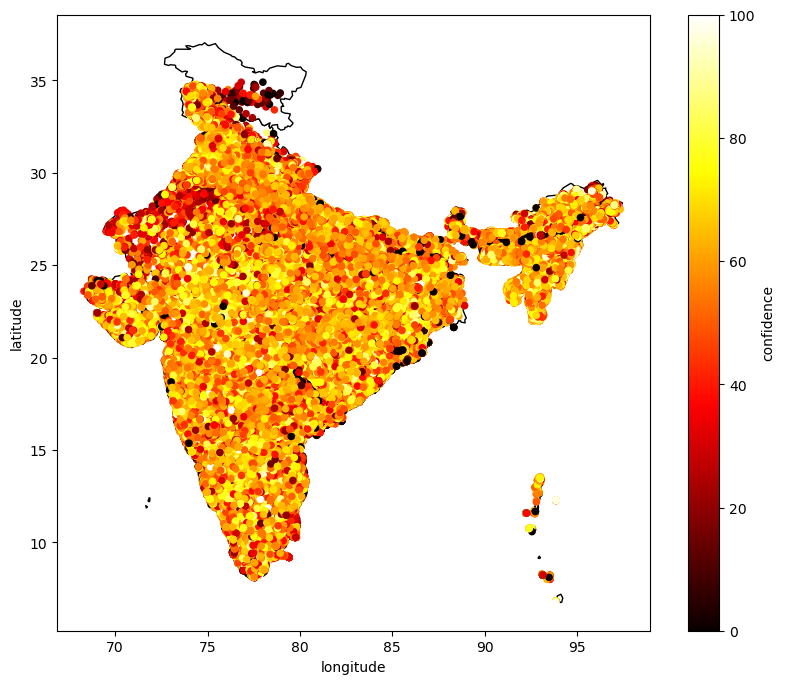

In [22]:
import os
os.environ["SHAPE_RESTORE_SHX"] = "YES"
import geopandas as gpd
import matplotlib.pyplot as plt

# Set filepath for the shapefile of India
fp = "C:/New folder/vs code programs/Forest Fire/1_Completed Codes/Shape_Files/india_st.shp"

# Read the shapefile using GeoPandas
india = gpd.read_file(fp)

# Plot the map of India
fig, ax = plt.subplots(figsize=(10, 8))
india.plot(ax=ax, color='white', edgecolor='black')

# Plot the location plotting of all observations
df.plot(ax=ax, x="longitude", y="latitude", kind="scatter", c="confidence",
        colormap="hot", figsize=(10, 8))

plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

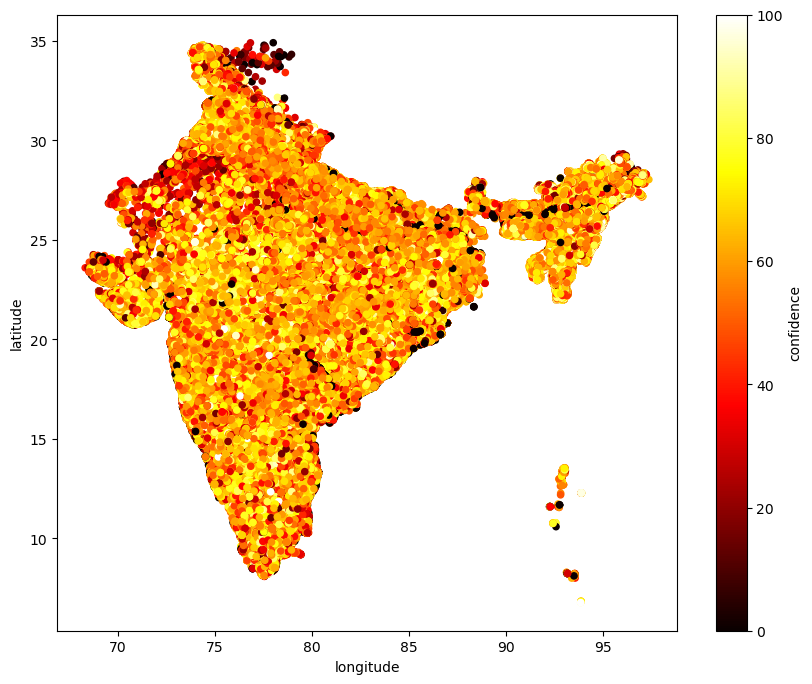

In [23]:
# loacation ploatting of all observations

df.plot(x="longitude", y="latitude", kind="scatter", c="confidence", colormap="hot",figsize=(10, 8))

In [24]:
sort_df = df[df['confidence'] >= 80]

NameError: name 'india' is not defined

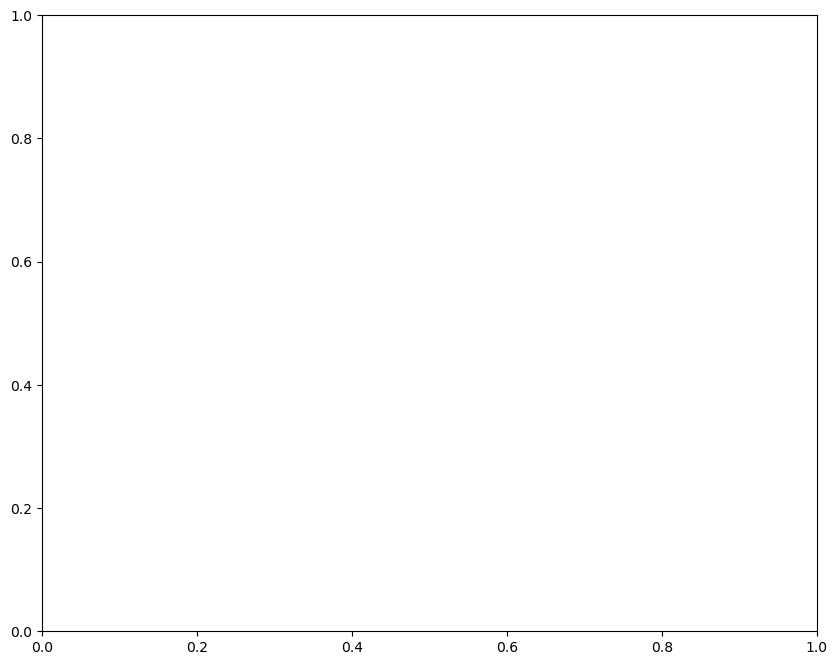

In [25]:
# Plot the map of India
fig, ax = plt.subplots(figsize=(10, 8))
india.plot(ax=ax, color='white', edgecolor='black')

# Plot the location plotting of all observations
sort_df.plot(ax=ax, x="longitude", y="latitude", kind="scatter", c="confidence",
        colormap="hot", figsize=(10, 8))

plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

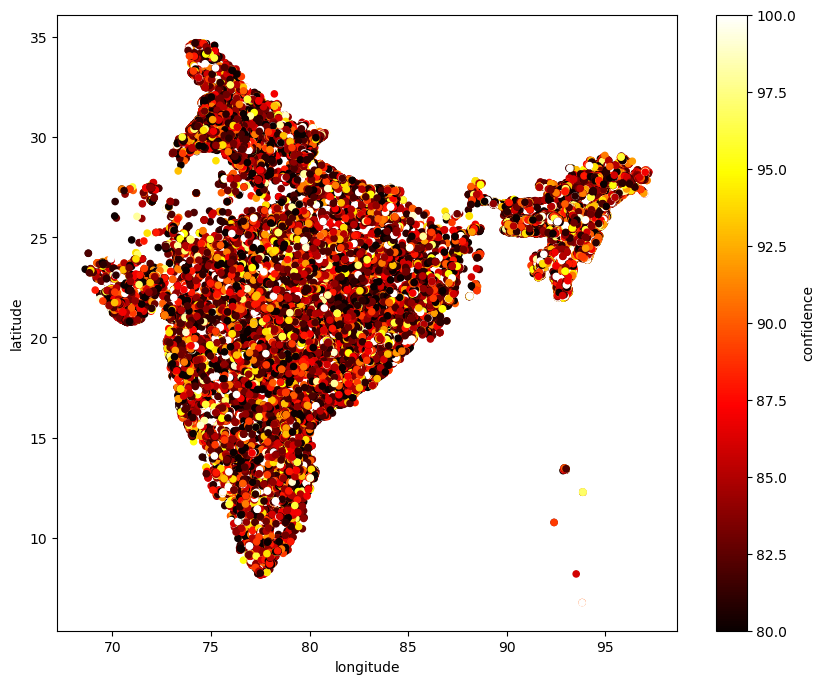

In [26]:
# loacation ploatting of all observations

sort_df.plot(x="longitude", y="latitude", kind="scatter", c="confidence",
        colormap="hot",figsize=(10, 8))

In [27]:
# Get the bounding box of the shapefile (envelope)
bounding_box = india.total_bounds

# Extract min and max values for longitude and latitude
min_longitude, min_latitude, max_longitude, max_latitude = bounding_box

print("Longitude Interval:", min_longitude, "-", max_longitude)
print("Latitude Interval:", min_latitude, "-", max_latitude)

NameError: name 'india' is not defined

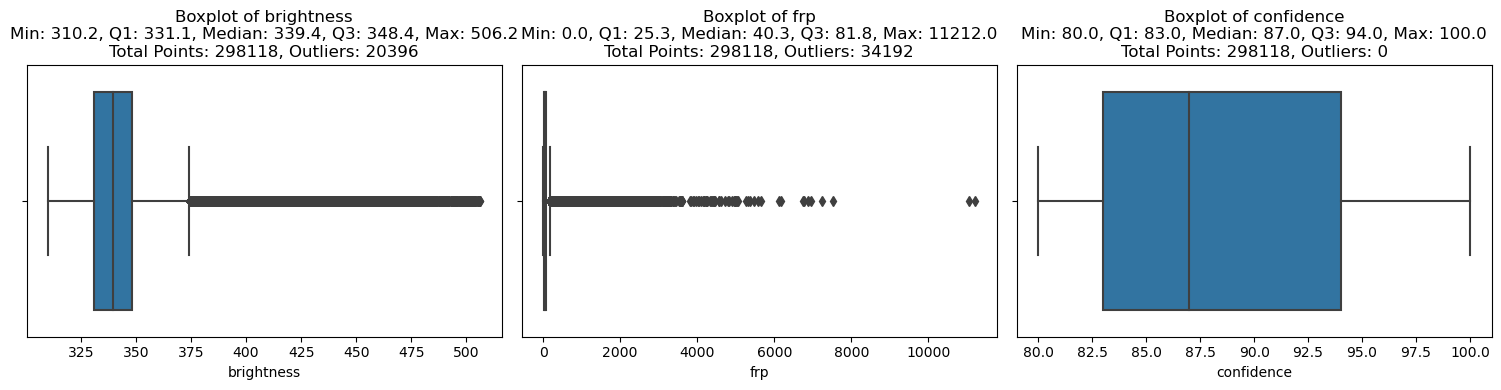

Total Points: 894354
Total Outliers: 54588


In [ ]:
columns_of_interest = ['brightness', 'frp', 'confidence']

# Create a figure and axis for subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# Flatten axes array for easier iteration
axes = axes.flatten()

total_points = 0
total_outliers = 0

# Loop through each column in the DataFrame
for i, column in enumerate(columns_of_interest):
    # Create a boxplot for the current column
    sns.boxplot(x=sort_df[column], ax=axes[i])

    # Calculate summary statistics
    stats = sort_df[column].describe()

    # Calculate interquartile range (IQR)
    iqr = stats['75%'] - stats['25%']

    # Define outlier thresholds
    lower_threshold = stats['25%'] - 1.5 * iqr
    upper_threshold = stats['75%'] + 1.5 * iqr

    # Count total points and outliers
    total_points += len(sort_df[column])
    total_outliers += ((sort_df[column] < lower_threshold) | (sort_df[column] > upper_threshold)).sum()

    # Construct title with statistics
    title = f'Boxplot of {column}\n'
    title += f"Min: {stats['min']}, Q1: {stats['25%']}, Median: {stats['50%']}, Q3: {stats['75%']}, Max: {stats['max']}"
    title += f"\nTotal Points: {len(sort_df[column])}, Outliers: {((sort_df[column] < lower_threshold) | (sort_df[column] > upper_threshold)).sum()}"

    # Set title and x-axis label
    axes[i].set_title(title)
    axes[i].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

print(f"Total Points: {total_points}")
print(f"Total Outliers: {total_outliers}")

In [29]:
df.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   23.6805    86.0949       318.9   1.2    1.1  2000-11-01       501   
1   21.9091    72.6818       305.3   1.0    1.0  2000-11-01      1735   
2   21.9116    72.7610       302.3   1.0    1.0  2000-11-01      1735   
3   21.9012    72.7529       314.5   1.0    1.0  2000-11-01      1735   
4   21.9026    72.7626       302.9   1.0    1.0  2000-11-01      1735   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  \
0     Terra      MODIS          67      6.2       303.3  12.1        D     2   
1     Terra      MODIS          64      6.2       292.6   7.0        N     0   
2     Terra      MODIS          48      6.2       292.2   4.9        N     2   
3     Terra      MODIS          89      6.2       292.5  13.4        N     2   
4     Terra      MODIS          52      6.2       292.1   5.2        N     2   

   Year  Month  Day  
0  2000     11    1  
1  2000     11    1  
2  2000     11    1  
3  2000     11    1  
4  2000     11    1

In [30]:
drop_df=sort_df.drop(['satellite','instrument','scan','track','version','acq_time','bright_t31'],axis=1)

In [31]:
df_encoded = pd.get_dummies(drop_df, columns=['daynight'])

**type: Inferred hot spot type:**

0= presumed vegetation fire (Fires ssociated with vegetation, such as forest fires, grassland fires, or wildfires)

1= active volcano (This category likely represents events associated with active volcanoes.)

2= other static land source (industrial fires, building fires, or any other non-vegetation, non-volcanic incidents.)

3= offshore (ocated in bodies of water rather than on land. )

In [32]:
df_encoded=df_encoded[df_encoded['type'].isin([0, 2])]

In [33]:
df_encoded.type.unique()

array([2, 0], dtype=int64)

In [34]:
df_encoded=df_encoded.drop(['type'],axis=1)
df_encoded.head()

latitude  longitude  brightness    acq_date  confidence   frp  Year  \
3    21.9012    72.7529       314.5  2000-11-01          89  13.4  2000   
7    21.5099    72.8509       343.3  2000-11-01         100  50.5  2000   
8    21.9102    72.7513       311.9  2000-11-01          84  11.3  2000   
29   21.0788    79.7843       334.3  2000-11-02          84  32.0  2000   
35   33.1521    76.3293       323.5  2000-11-02          82  29.0  2000   

    Month  Day  daynight_D  daynight_N  
3      11    1           0           1  
7      11    1           0           1  
8      11    1           0           1  
29     11    2           1           0  
35     11    2           1           0

# Without Scaling

In [35]:
# # min max feature scaling - optimize the drop_df
# def minmax(column):
#     df_encoded[column] = (df_encoded[column] - df_encoded[column].min()) / (df_encoded[column].max() - df_encoded[column].min())

# minmax('brightness')
# minmax('frp')

In [36]:
df_encoded.head()

latitude  longitude  brightness    acq_date  confidence   frp  Year  \
3    21.9012    72.7529       314.5  2000-11-01          89  13.4  2000   
7    21.5099    72.8509       343.3  2000-11-01         100  50.5  2000   
8    21.9102    72.7513       311.9  2000-11-01          84  11.3  2000   
29   21.0788    79.7843       334.3  2000-11-02          84  32.0  2000   
35   33.1521    76.3293       323.5  2000-11-02          82  29.0  2000   

    Month  Day  daynight_D  daynight_N  
3      11    1           0           1  
7      11    1           0           1  
8      11    1           0           1  
29     11    2           1           0  
35     11    2           1           0

In [37]:
df_encoded = df_encoded.reset_index(drop=True)

In [38]:
df_encoded

latitude  longitude  brightness    acq_date  confidence   frp  Year  \
0        21.9012    72.7529       314.5  2000-11-01          89  13.4  2000   
1        21.5099    72.8509       343.3  2000-11-01         100  50.5  2000   
2        21.9102    72.7513       311.9  2000-11-01          84  11.3  2000   
3        21.0788    79.7843       334.3  2000-11-02          84  32.0  2000   
4        33.1521    76.3293       323.5  2000-11-02          82  29.0  2000   
...          ...        ...         ...         ...         ...   ...   ...   
298076   26.5447    95.0423       319.9  2021-12-30          80  17.1  2021   
298077   17.8648    74.7937       327.7  2021-12-30          82  24.7  2021   
298078   15.8202    76.9243       339.8  2021-12-30          89  36.3  2021   
298079   16.6575    74.7251       317.8  2021-12-31          96  24.6  2021   
298080   19.2353    76.9526       315.4  2021-12-31          91  15.3  2021   

        Month  Day  daynight_D  daynight_N  
0          11    1           0           1  
1          11    1           0           1  
2          11    1           0           1  
3          11    2           1           0  
4          11    2           1           0  
...       ...  ...         ...         ...  
298076     12   30           1           0  
298077     12   30           1           0  
298078     12   30           1           0  
298079     12   31           0           1  
298080     12   31           0           1  

[298081 rows x 11 columns]

In [39]:
df_encoded.describe()

latitude      longitude     brightness     confidence  \
count  298081.000000  298081.000000  298081.000000  298081.000000   
mean       24.629121      84.550663     342.644273      88.801903   
std         4.389250       7.912838      21.024227       6.799508   
min         6.767600      68.620500     310.200000      80.000000   
25%        22.609400      76.569200     331.100000      83.000000   
50%        24.465700      83.117800     339.400000      87.000000   
75%        27.296100      92.821300     348.400000      94.000000   
max        34.709500      97.207000     506.200000     100.000000   

                 frp           Year          Month            Day  \
count  298081.000000  298081.000000  298081.000000  298081.000000   
mean       89.895472    2012.085685       4.572388      15.594533   
std       184.073165       5.670027       2.765438       8.779374   
min         0.000000    2000.000000       1.000000       1.000000   
25%        25.300000    2007.000000       3.000000       8.000000   
50%        40.300000    2012.000000       4.000000      15.000000   
75%        81.800000    2017.000000       5.000000      23.000000   
max     11212.000000    2021.000000      12.000000      31.000000   

          daynight_D     daynight_N  
count  298081.000000  298081.000000  
mean        0.885269       0.114731  
std         0.318697       0.318697  
min         0.000000       0.000000  
25%         1.000000       0.000000  
50%         1.000000       0.000000  
75%         1.000000       0.000000  
max         1.000000       1.000000

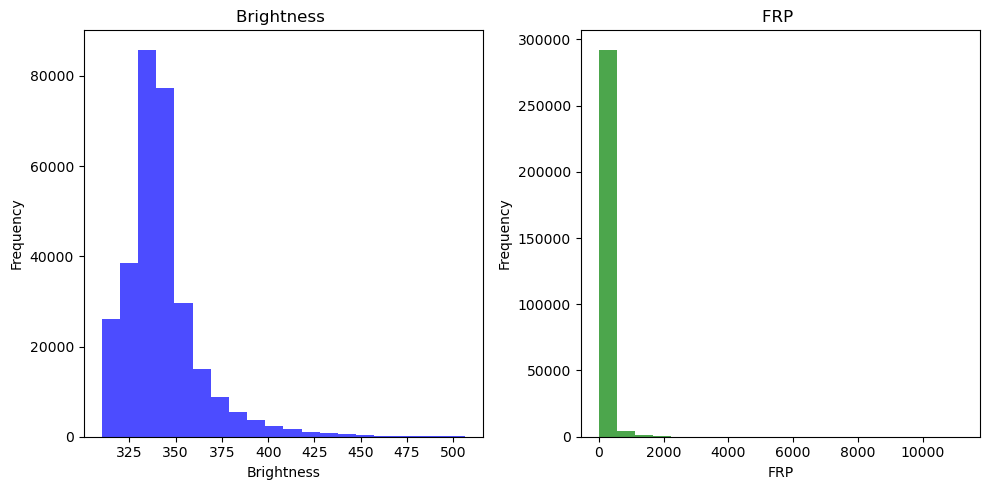

In [40]:
# Plot histograms for brightness and frp after logarithmic transformation
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df_encoded['brightness'], bins=20, color='blue', alpha=0.7)
plt.title('Brightness ')
plt.xlabel('Brightness')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_encoded['frp'], bins=20, color='green', alpha=0.7)
plt.title('FRP ')
plt.xlabel('FRP')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [41]:
df_main=df_encoded.copy()

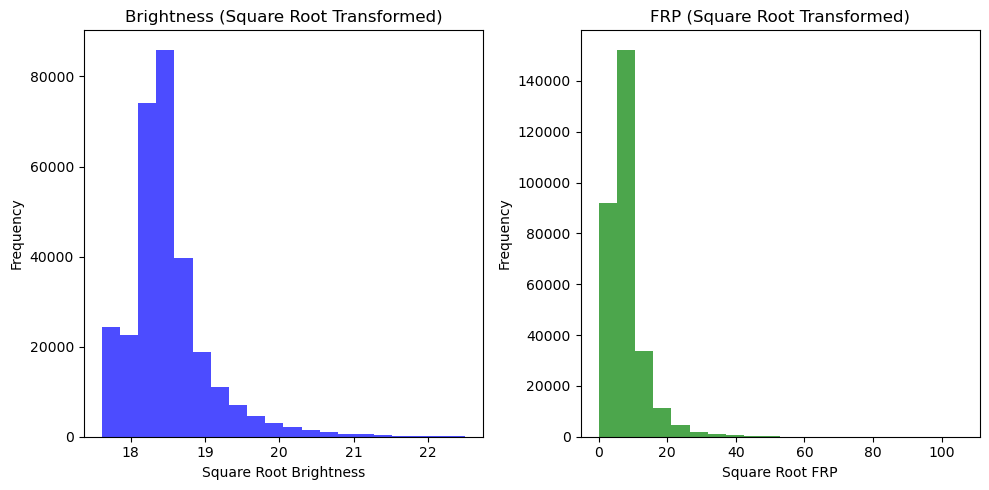

In [42]:
df_main['brightness'] = np.sqrt(df_main['brightness'])
df_main['frp'] = np.sqrt(df_main['frp'])

# Plot histograms for brightness and frp after square root transformation
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df_main['brightness'], bins=20, color='blue', alpha=0.7)
plt.title('Brightness (Square Root Transformed)')
plt.xlabel('Square Root Brightness')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_main['frp'], bins=20, color='green', alpha=0.7)
plt.title('FRP (Square Root Transformed)')
plt.xlabel('Square Root FRP')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [43]:
df_main

latitude  longitude  brightness    acq_date  confidence       frp  \
0        21.9012    72.7529   17.734148  2000-11-01          89  3.660601   
1        21.5099    72.8509   18.528357  2000-11-01         100  7.106335   
2        21.9102    72.7513   17.660691  2000-11-01          84  3.361547   
3        21.0788    79.7843   18.283873  2000-11-02          84  5.656854   
4        33.1521    76.3293   17.986106  2000-11-02          82  5.385165   
...          ...        ...         ...         ...         ...       ...   
298076   26.5447    95.0423   17.885749  2021-12-30          80  4.135215   
298077   17.8648    74.7937   18.102486  2021-12-30          82  4.969909   
298078   15.8202    76.9243   18.433665  2021-12-30          89  6.024948   
298079   16.6575    74.7251   17.826946  2021-12-31          96  4.959839   
298080   19.2353    76.9526   17.759504  2021-12-31          91  3.911521   

        Year  Month  Day  daynight_D  daynight_N  
0       2000     11    1           0           1  
1       2000     11    1           0           1  
2       2000     11    1           0           1  
3       2000     11    2           1           0  
4       2000     11    2           1           0  
...      ...    ...  ...         ...         ...  
298076  2021     12   30           1           0  
298077  2021     12   30           1           0  
298078  2021     12   30           1           0  
298079  2021     12   31           0           1  
298080  2021     12   31           0           1  

[298081 rows x 11 columns]

In [44]:
# df_main=df_main.drop(['daynight_D','daynight_N'],axis=1)

In [45]:
df_main

latitude  longitude  brightness    acq_date  confidence       frp  \
0        21.9012    72.7529   17.734148  2000-11-01          89  3.660601   
1        21.5099    72.8509   18.528357  2000-11-01         100  7.106335   
2        21.9102    72.7513   17.660691  2000-11-01          84  3.361547   
3        21.0788    79.7843   18.283873  2000-11-02          84  5.656854   
4        33.1521    76.3293   17.986106  2000-11-02          82  5.385165   
...          ...        ...         ...         ...         ...       ...   
298076   26.5447    95.0423   17.885749  2021-12-30          80  4.135215   
298077   17.8648    74.7937   18.102486  2021-12-30          82  4.969909   
298078   15.8202    76.9243   18.433665  2021-12-30          89  6.024948   
298079   16.6575    74.7251   17.826946  2021-12-31          96  4.959839   
298080   19.2353    76.9526   17.759504  2021-12-31          91  3.911521   

        Year  Month  Day  daynight_D  daynight_N  
0       2000     11    1           0           1  
1       2000     11    1           0           1  
2       2000     11    1           0           1  
3       2000     11    2           1           0  
4       2000     11    2           1           0  
...      ...    ...  ...         ...         ...  
298076  2021     12   30           1           0  
298077  2021     12   30           1           0  
298078  2021     12   30           1           0  
298079  2021     12   31           0           1  
298080  2021     12   31           0           1  

[298081 rows x 11 columns]

# do not run the next program

In [46]:
# import seaborn as sns

# # Select the columns of interest from your DataFrame
# selected_columns = ['latitude', 'longitude', 'brightness', 'confidence', 'frp', 'Day']

# # Plot interrelated distplot using pairplot
# sns.pairplot(df_encoded[selected_columns], kind="kde", diag_kind="kde", markers=".")
# plt.show()

# Train Test data

In [47]:
# total_rows = len(df_main)
# train_rows = int(0.8 * total_rows)
# test_rows = total_rows - train_rows

# # Split the dataset into training and testing sets
# train_data = df_main.iloc[:train_rows]
# test_data = df_main.iloc[train_rows:]

# # Print the shapes of the training and testing sets
# print("Training data shape:", train_data.shape)
# print("Testing data shape:", test_data.shape)

In [48]:
# train_data

In [49]:
# test_data

**Time Series Plot**

In [50]:
# Selecting only 'acq_date' and 'confidence' columns
forest_data = df_main[['acq_date', 'confidence']]
# Renaming columns
#forest_data = forest_data.rename(columns={'acq_date': 'date', 'confidence': 'confidence'})
forest_data.head()

acq_date  confidence
0  2000-11-01          89
1  2000-11-01         100
2  2000-11-01          84
3  2000-11-02          84
4  2000-11-02          82

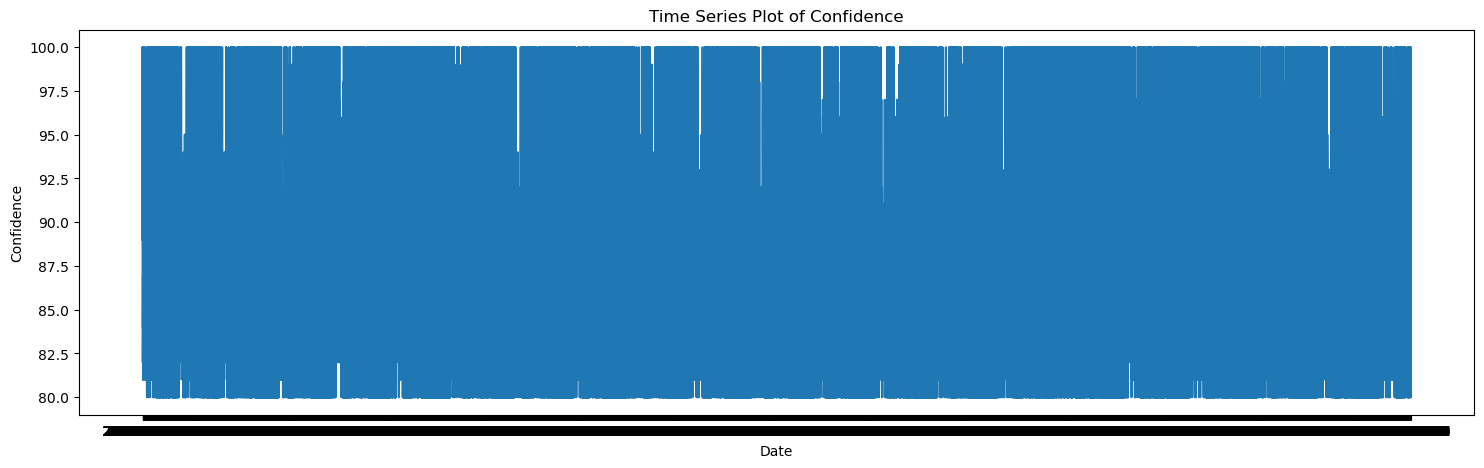

In [51]:
# Plot the time series
plt.figure(figsize=(18, 5))
plt.plot(forest_data['acq_date'], forest_data['confidence'])
plt.title('Time Series Plot of Confidence')
plt.xlabel('Date')
plt.ylabel('Confidence')
plt.show()

C:\Users\2248317\AppData\Local\Temp\ipykernel_7888\1009210612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_data['acq_date'] = pd.to_datetime(forest_data['acq_date'])


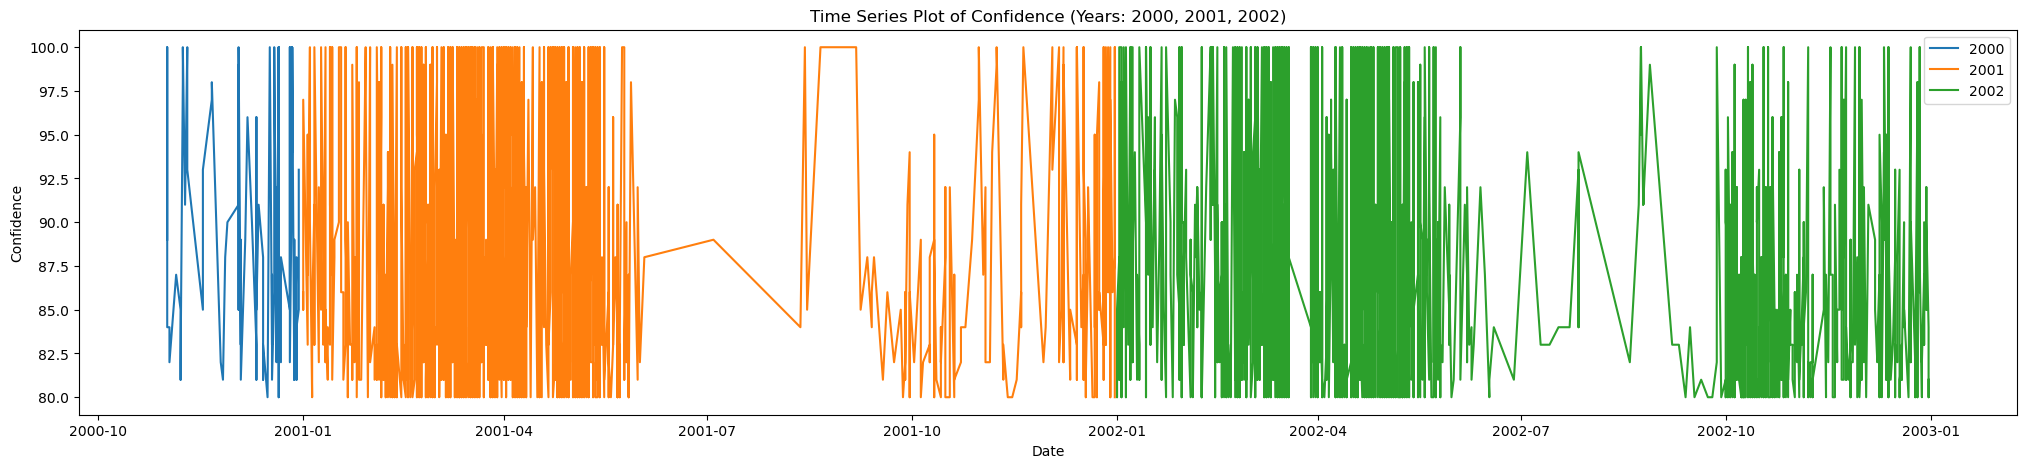

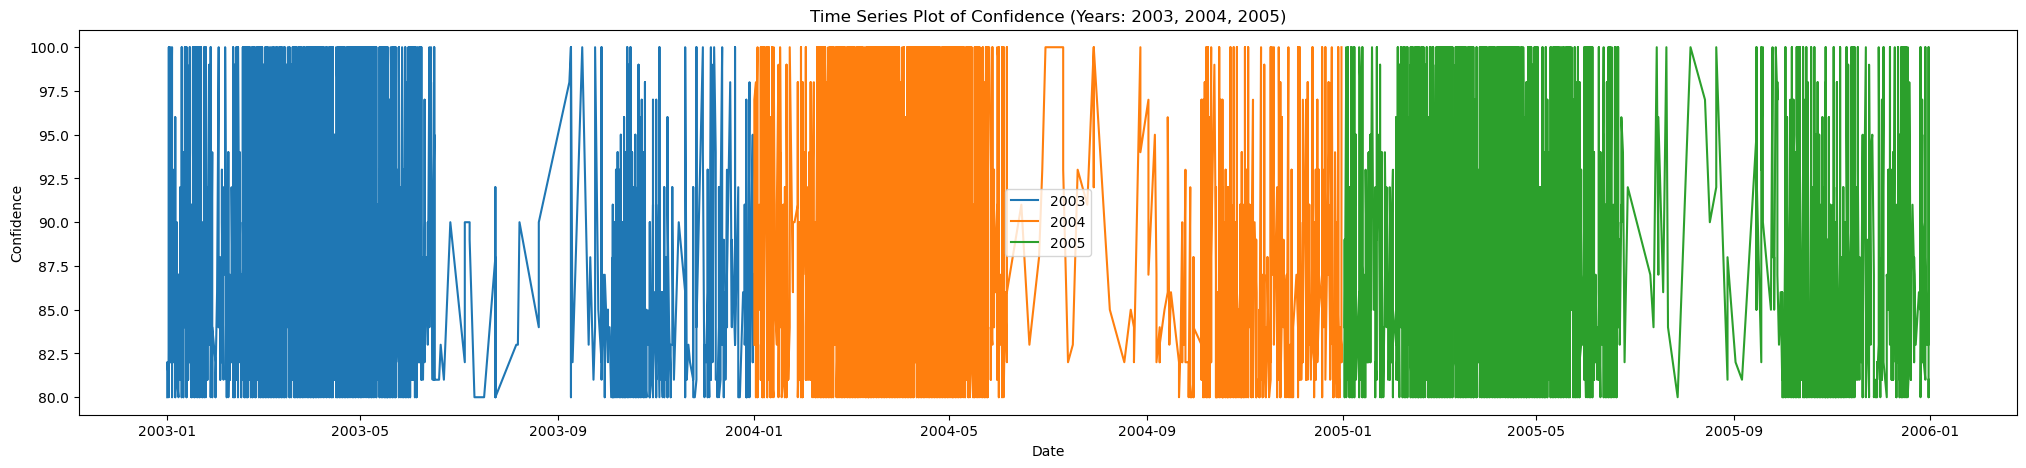

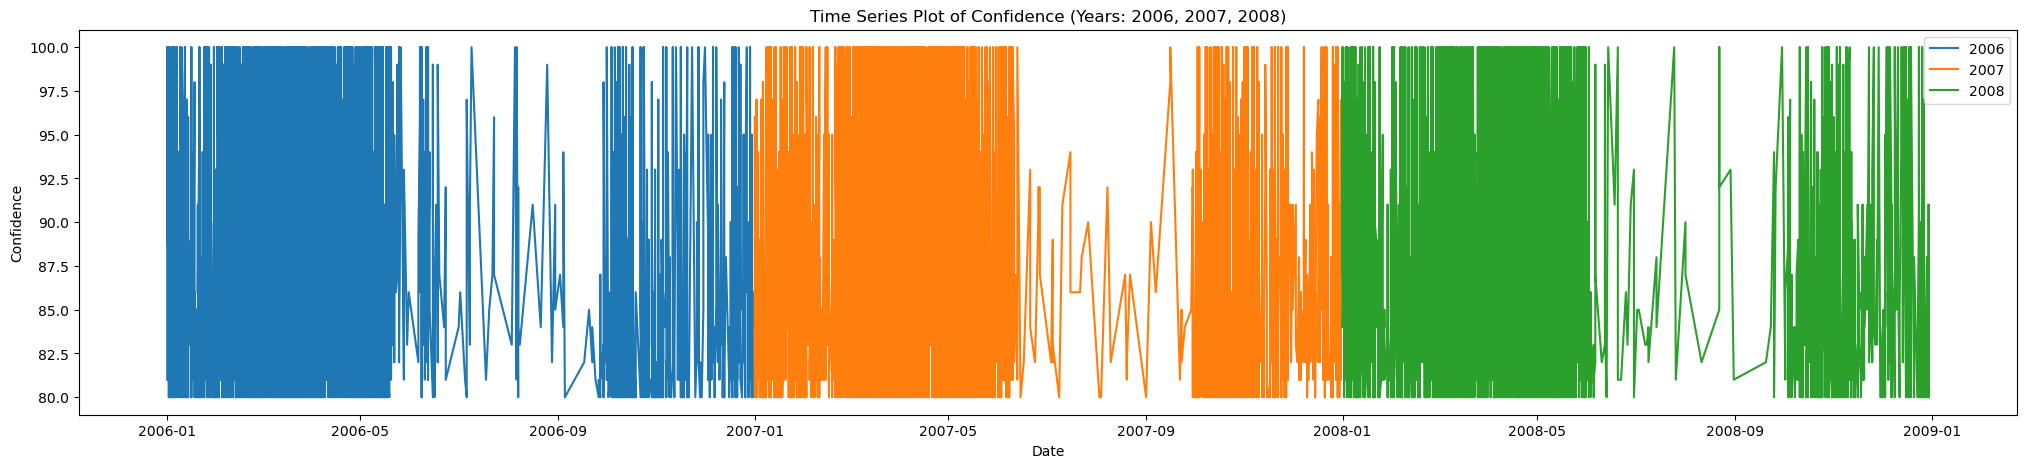

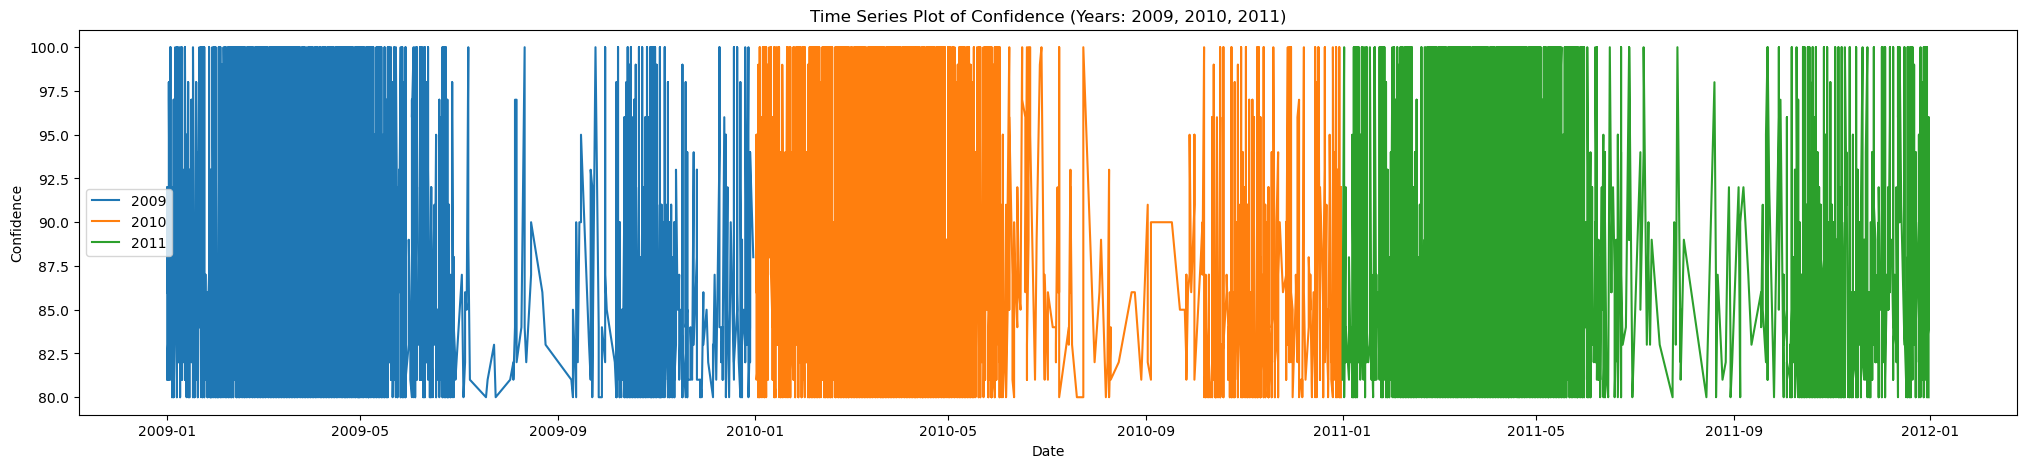

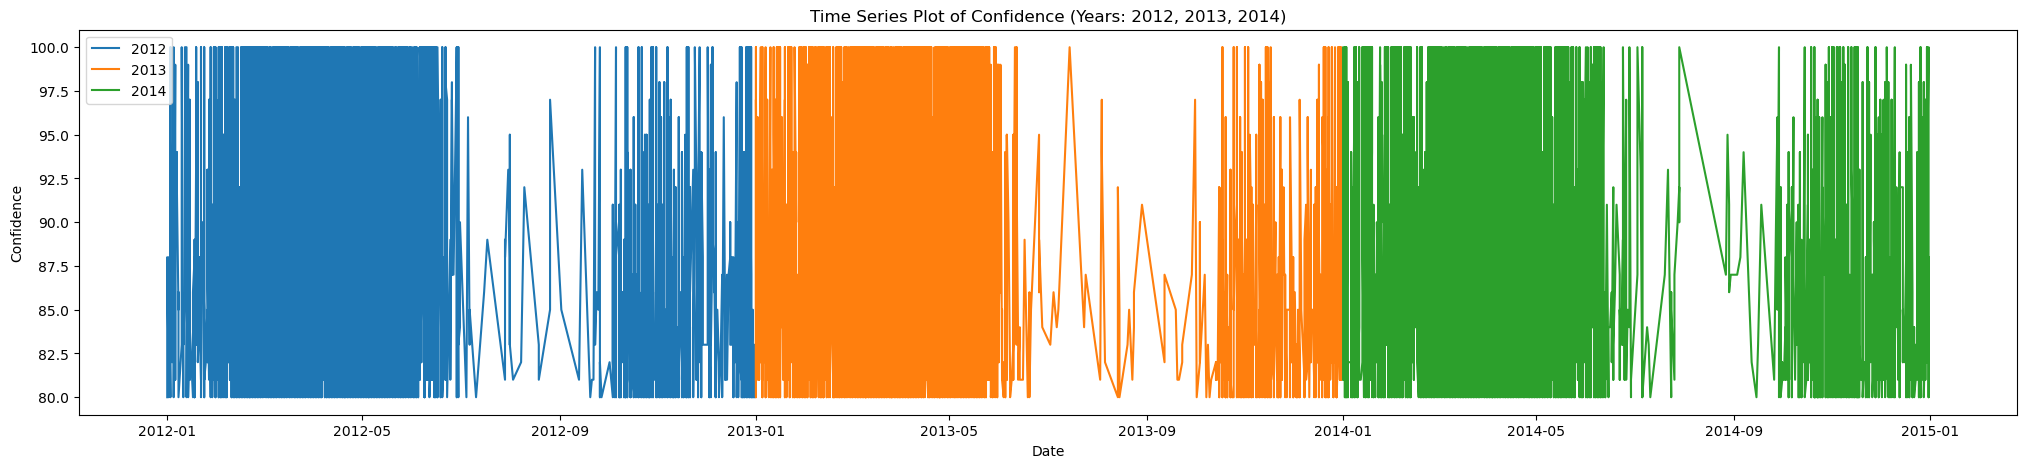

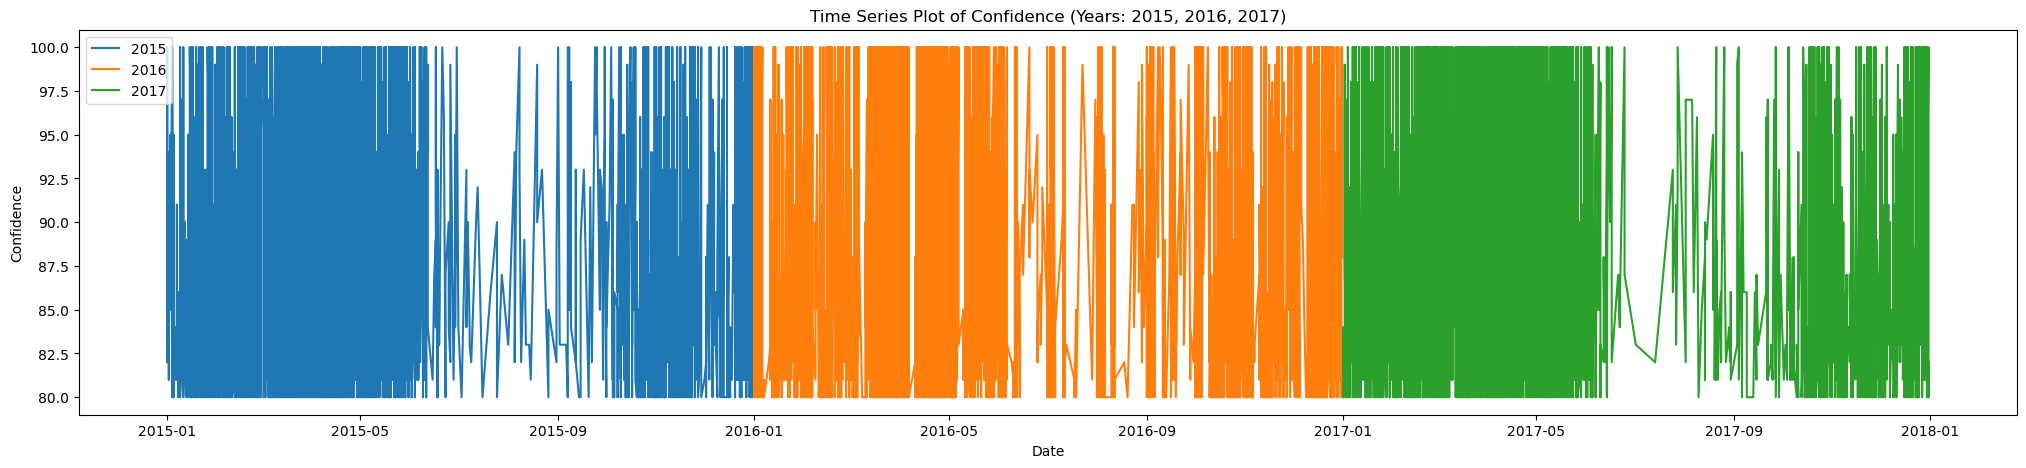

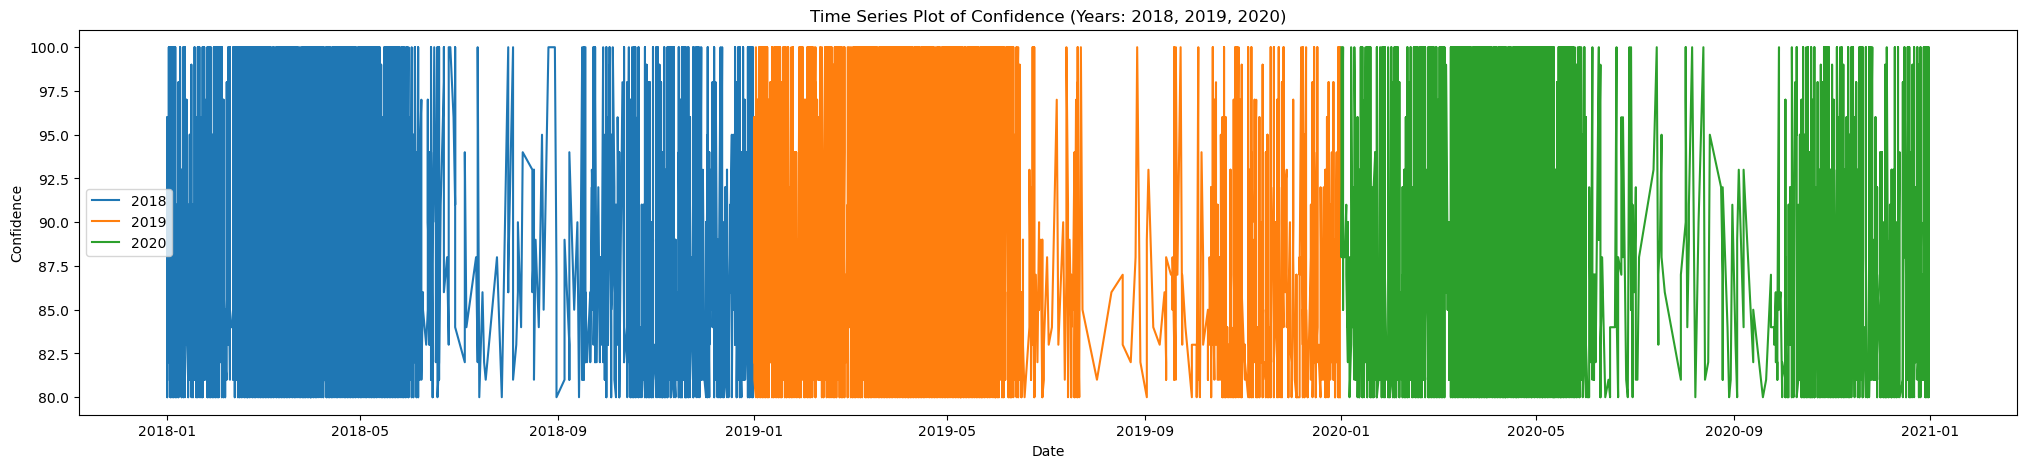

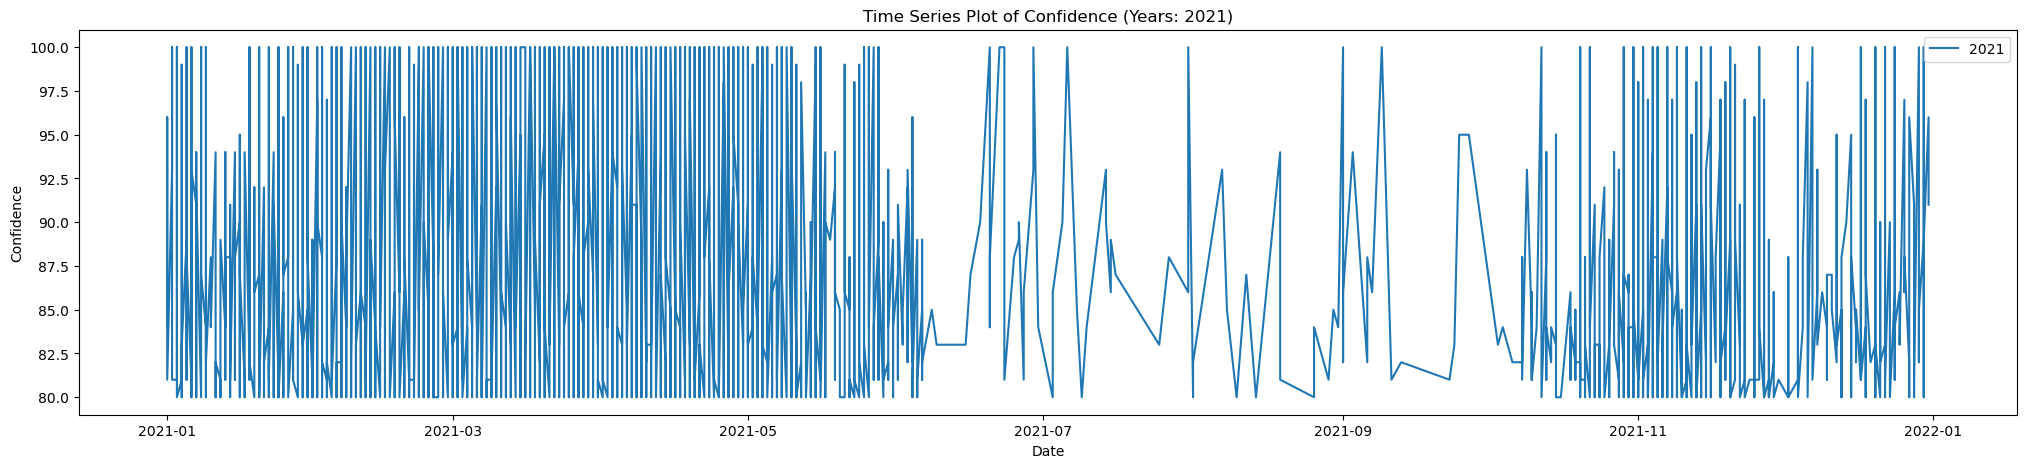

In [52]:
# Convert 'acq_date' column to datetime format
forest_data['acq_date'] = pd.to_datetime(forest_data['acq_date'])

# Group data by year
grouped_data = forest_data.groupby(forest_data['acq_date'].dt.year)

# Split years into chunks of 4 years each
year_chunks = [list(grouped_data.groups.keys())[i:i+3] for i in range(0, len(grouped_data), 3)]

# Plotting time series for each chunk of 4 years
for chunk in year_chunks:
    plt.figure(figsize=(25, 5))
    for year in chunk:
        group = grouped_data.get_group(year)
        plt.plot(group['acq_date'], group['confidence'], label=str(year))
    
    plt.title('Time Series Plot of Confidence (Years: {})'.format(', '.join(map(str, chunk))))
    plt.xlabel('Date')
    plt.ylabel('Confidence')
    plt.legend()
    plt.show()


C:\Users\2248317\AppData\Local\Temp\ipykernel_7888\1569882532.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_main.corr(), vmin=-1, vmax=1, annot=True)


Text(0.5, 1.0, 'Correlation Heatmap')

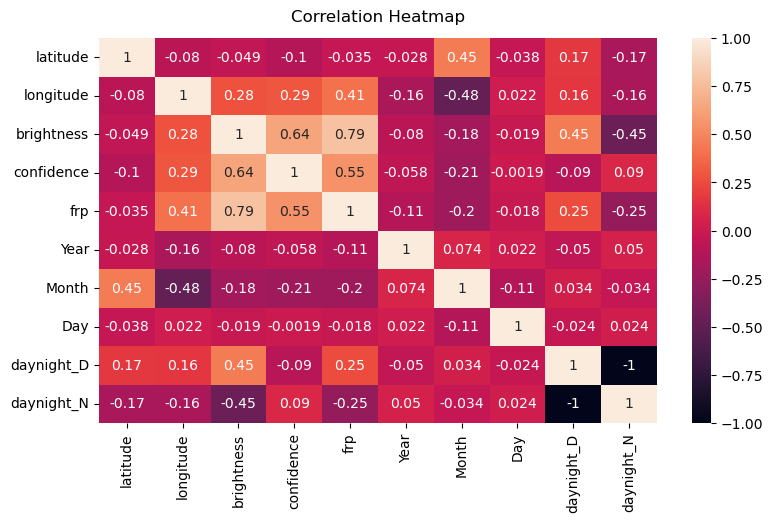

In [53]:
plt.figure(figsize=(9, 5))
heatmap = sns.heatmap(df_main.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [54]:
df_main.head()

latitude  longitude  brightness    acq_date  confidence       frp  Year  \
0   21.9012    72.7529   17.734148  2000-11-01          89  3.660601  2000   
1   21.5099    72.8509   18.528357  2000-11-01         100  7.106335  2000   
2   21.9102    72.7513   17.660691  2000-11-01          84  3.361547  2000   
3   21.0788    79.7843   18.283873  2000-11-02          84  5.656854  2000   
4   33.1521    76.3293   17.986106  2000-11-02          82  5.385165  2000   

   Month  Day  daynight_D  daynight_N  
0     11    1           0           1  
1     11    1           0           1  
2     11    1           0           1  
3     11    2           1           0  
4     11    2           1           0

C:\Users\2248317\AppData\Local\Temp\ipykernel_7888\3410908406.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(columns.corr(), vmin=-1, vmax=1, annot=True)


Text(0.5, 1.0, 'Correlation Heatmap')

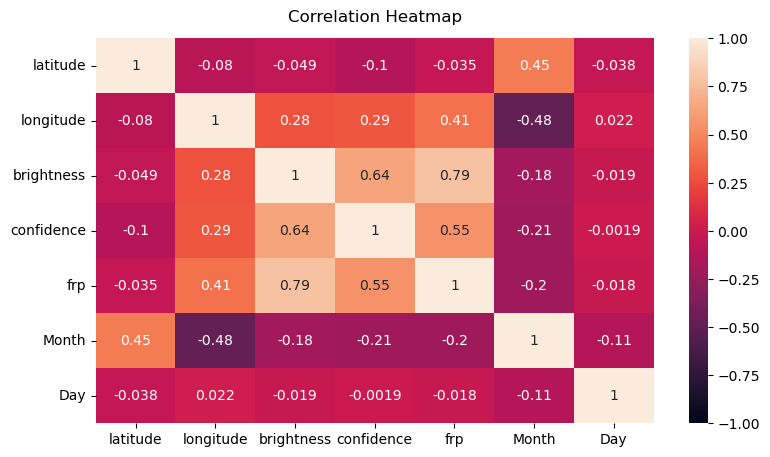

In [55]:
columns=df_main[['latitude',	'longitude'	,'brightness',	'acq_date',	'confidence',	'frp',	'Month', 'Day']]
plt.figure(figsize=(9, 5))
heatmap = sns.heatmap(columns.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

**Stationarity Check**

In [56]:
from statsmodels.tsa.stattools import adfuller

In [57]:
# Perform the ADF test
result = adfuller(df_main['confidence'])

# Extract and print the results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

ADF Statistic: -26.21365963415664
p-value: 0.0
Critical Values:
   1%: -3.430371944811526
   5%: -2.8615496993339025
   10%: -2.5667751626036575


In [56]:
df_main.head()

latitude  longitude  brightness    acq_date  confidence       frp  Year  \
0   21.9012    72.7529   17.734148  2000-11-01          89  3.660601  2000   
1   21.5099    72.8509   18.528357  2000-11-01         100  7.106335  2000   
2   21.9102    72.7513   17.660691  2000-11-01          84  3.361547  2000   
3   21.0788    79.7843   18.283873  2000-11-02          84  5.656854  2000   
4   33.1521    76.3293   17.986106  2000-11-02          82  5.385165  2000   

   Month  Day  daynight_D  daynight_N  
0     11    1           0           1  
1     11    1           0           1  
2     11    1           0           1  
3     11    2           1           0  
4     11    2           1           0

In [57]:
# train_data.shape

In [58]:
# test_data.shape

# XGBoost

In [59]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Splitting data into features and target
X = df_main.drop(columns=["confidence", "acq_date"])  # Excluding acq_date as it's not useful for modeling
y = df_main["confidence"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [63]:
X_train

latitude  longitude  brightness       frp  Year  Month  Day  \
0        21.9012    72.7529   17.734148  3.660601  2000     11    1   
1        21.5099    72.8509   18.528357  7.106335  2000     11    1   
2        21.9102    72.7513   17.660691  3.361547  2000     11    1   
3        21.0788    79.7843   18.283873  5.656854  2000     11    2   
4        33.1521    76.3293   17.986106  5.385165  2000     11    2   
...          ...        ...         ...       ...   ...    ...  ...   
238459   27.7690    93.1804   18.251027  5.761944  2018      4    4   
238460   27.2623    93.3191   18.047160  4.626013  2018      4    4   
238461   27.2632    93.6431   18.229098  5.366563  2018      4    4   
238462   27.2618    93.6529   18.124569  4.898979  2018      4    4   
238463   27.3012    93.5043   18.124569  4.919350  2018      4    4   

        daynight_D  daynight_N  
0                0           1  
1                0           1  
2                0           1  
3                1           0  
4                1           0  
...            ...         ...  
238459           1           0  
238460           1           0  
238461           1           0  
238462           1           0  
238463           1           0  

[238464 rows x 9 columns]

In [64]:
X_test

latitude  longitude  brightness        frp  Year  Month  Day  \
238464   27.2998    93.5144   18.083141   4.743416  2018      4    4   
238465   23.6823    91.9912   18.915602  14.560220  2018      4    4   
238466   25.0484    93.9901   18.398369   5.796551  2018      4    4   
238467   24.2749    92.9018   18.587630   7.134424  2018      4    4   
238468   23.6843    92.0113   18.338484   9.370165  2018      4    4   
...          ...        ...         ...        ...   ...    ...  ...   
298076   26.5447    95.0423   17.885749   4.135215  2021     12   30   
298077   17.8648    74.7937   18.102486   4.969909  2021     12   30   
298078   15.8202    76.9243   18.433665   6.024948  2021     12   30   
298079   16.6575    74.7251   17.826946   4.959839  2021     12   31   
298080   19.2353    76.9526   17.759504   3.911521  2021     12   31   

        daynight_D  daynight_N  
238464           1           0  
238465           1           0  
238466           1           0  
238467           1           0  
238468           1           0  
...            ...         ...  
298076           1           0  
298077           1           0  
298078           1           0  
298079           0           1  
298080           0           1  

[59617 rows x 9 columns]

In [65]:
# Define the XGBoost regressor
xgb_reg = XGBRegressor()

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Use the best model to make predictions
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}
Mean Squared Error: 2.350624142295643


In [66]:
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Adjusted R-squared (assuming you have the number of predictors, p)
n = len(y_test) # number of samples
p = X_train.shape[1] # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)

# Calculate Explained Variance Score
explained_var_score = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_var_score)

Mean Absolute Error: 0.8988264177826827
Root Mean Squared Error: 1.5331745309310494
R-squared: 0.9468034355492931
Adjusted R-squared: 0.946795403454404
Explained Variance Score: 0.9468116923586721


# before

In [67]:
# Define the XGBoost regressor
xgb_reg = XGBRegressor()

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Use the best model to make predictions
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}
Mean Squared Error: 2.350624142295643


In [68]:
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Adjusted R-squared (assuming you have the number of predictors, p)
n = len(y_test) # number of samples
p = X_train.shape[1] # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)

# Calculate Explained Variance Score
explained_var_score = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_var_score)

Mean Absolute Error: 0.8988264177826827
Root Mean Squared Error: 1.5331745309310494
R-squared: 0.9468034355492931
Adjusted R-squared: 0.946795403454404
Explained Variance Score: 0.9468116923586721


# after

In [69]:
# Define the XGBoost regressor
xgb_reg = XGBRegressor()

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}

# Grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Use the best model to make predictions
best_xgb_1 = grid_search.best_estimator_
y_pred = best_xgb_1.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Fitting 5 folds for each of 200000 candidates, totalling 1000000 fits


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Adjusted R-squared (assuming you have the number of predictors, p)
n = len(y_test) # number of samples
p = X_train.shape[1] # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)

# Calculate Explained Variance Score
explained_var_score = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_var_score)

Mean Absolute Error: 0.891427506419436
Root Mean Squared Error: 1.534626028535452
R-squared: 0.9467026626302092
Adjusted R-squared: 0.94669461531972
Explained Variance Score: 0.9467601325555038


c:\Users\Raj Bhardwaj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Adjusted R-squared (assuming you have the number of predictors, p)
n = len(y_test) # number of samples
p = X_train.shape[1] # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)

# Calculate Explained Variance Score
explained_var_score = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_var_score)


Mean Absolute Error: 1.1638834361894697
Root Mean Squared Error: 2.199059228832873
R-squared: 0.8905604631125268
Adjusted R-squared: 0.8905476114163364
Explained Variance Score: 0.8906250838206814


c:\Users\Raj Bhardwaj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 0.8116697901610712

This means that, on average, your model's predictions are off by approximately 0.81 units from the actual values.

Root Mean Squared Error (RMSE): 1.501796536058437

RMSE is the square root of the average of the squared differences between predicted and actual values. In your case, it suggests that the typical prediction error of your model is around 1.50 units. Since RMSE is in the same unit as your target variable, it provides a more interpretable measure of error compared to MSE.

R-squared (R2): 0.9471481124247201

R-squared is a measure of how well the independent variables explain the variability of the dependent variable. In your case, an R-squared value of approximately 0.95 indicates that about 95% of the variance in the target variable is explained by the independent variables included in your model. This is a high value and suggests that your model fits the data well.

Adjusted R-squared: 0.9471392176290476

Adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in the model. It penalizes the addition of unnecessary predictors that do not improve the model's performance. The adjusted R-squared value is very close to the R-squared value, indicating that the addition of predictors in your model has not significantly affected its performance.

Explained Variance Score: 0.9471492040554362

The explained variance score measures the proportion to which the model accounts for the variability in the target variable. In your case, it suggests that your model explains approximately 94.7% of the variance in the target variable.

In [ ]:
# test_data.head()

latitude  longitude  brightness    acq_date  confidence    frp  Year  \
238464   27.2998    93.5144       327.0  2018-04-04          81   22.5  2018   
238465   23.6823    91.9912       357.8  2018-04-04          99  212.0  2018   
238466   25.0484    93.9901       338.5  2018-04-04          90   33.6  2018   
238467   24.2749    92.9018       345.5  2018-04-04          93   50.9  2018   
238468   23.6843    92.0113       336.3  2018-04-04          87   87.8  2018   

        Month  Day  daynight_D  daynight_N  
238464      4    4           1           0  
238465      4    4           1           0  
238466      4    4           1           0  
238467      4    4           1           0  
238468      4    4           1           0

In [ ]:
import pickle
# Save the trained model to a pickle file
with open('best_xgb_p.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)

# Load the saved model from the pickle file
with open('best_xgb_p.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# # Use the loaded model to make predictions
# y_pred = loaded_model.predict(X_test)

# # Print the predictions
# print(y_pred)

In [ ]:
# Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)

# Print the predictions
print(y_pred)

# new data making for forecasting

In [199]:
df.describe()

latitude     longitude    brightness          scan         track  \
count  1.517093e+06  1.517093e+06  1.517093e+06  1.517093e+06  1.517093e+06   
mean   2.482021e+01  8.179949e+01  3.247795e+02  1.428866e+00  1.154459e+00   
std    5.011683e+00  7.155767e+00  1.530594e+01  6.532873e-01  2.070705e-01   
min    6.758600e+00  6.831440e+01  3.000000e+02  1.000000e+00  1.000000e+00   
25%    2.175220e+01  7.573970e+01  3.152000e+02  1.000000e+00  1.000000e+00   
50%    2.503740e+01  7.933190e+01  3.227000e+02  1.200000e+00  1.100000e+00   
75%    2.986760e+01  8.708010e+01  3.316000e+02  1.500000e+00  1.200000e+00   
max    3.490150e+01  9.733590e+01  5.062000e+02  4.800000e+00  2.000000e+00   

           acq_time    confidence       version    bright_t31           frp  \
count  1.517093e+06  1.517093e+06  1.517093e+06  1.517093e+06  1.517093e+06   
mean   7.984225e+02  6.457932e+01  6.160343e+00  3.034232e+02  3.101895e+01   
std    3.286154e+02  1.845311e+01  7.189572e-02  8.391447e+00  8.848726e+01   
min    3.330000e+02  0.000000e+00  6.030000e+00  2.660000e+02  0.000000e+00   
25%    6.350000e+02  5.400000e+01  6.200000e+00  2.982000e+02  9.000000e+00   
50%    7.460000e+02  6.600000e+01  6.200000e+00  3.025000e+02  1.420000e+01   
75%    8.170000e+02  7.700000e+01  6.200000e+00  3.089000e+02  2.610000e+01   
max    2.151000e+03  1.000000e+02  6.200000e+00  4.001000e+02  1.121200e+04   

               type          Year         Month           Day  
count  1.517093e+06  1.517093e+06  1.517093e+06  1.517093e+06  
mean   6.749421e-02  1.895176e+03  5.511906e+00  1.327663e+02  
std    3.624387e-01  4.685873e+02  3.506789e+00  4.696783e+02  
min    0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
25%    0.000000e+00  2.006000e+03  3.000000e+00  8.000000e+00  
50%    0.000000e+00  2.011000e+03  4.000000e+00  1.600000e+01  
75%    0.000000e+00  2.017000e+03  1.000000e+01  2.500000e+01  
max    3.000000e+00  2.021000e+03  1.200000e+01  2.016000e+03

In [200]:
df_for = df_main[['latitude','longitude','daynight_D','daynight_N']]

In [201]:
# df_for['brightness_min'] = (df_main['brightness'].min() - df_main['brightness'].min()) / (df_main['brightness'].max() - df_main['brightness'].min())
# df_for['frp_min'] = (df_main['frp'].min() - df_main['frp'].min()) / (df_main['frp'].max() - df_main['frp'].min())

# df_for['brightness_min'] = np.sqrt(df_main['brightness'])
# df_for['frp_min'] = np.sqrt(df_main['frp'])

In [202]:
df_for.head()

latitude  longitude  daynight_D  daynight_N
0   21.9012    72.7529           0           1
1   21.5099    72.8509           0           1
2   21.9102    72.7513           0           1
3   21.0788    79.7843           1           0
4   33.1521    76.3293           1           0

In [185]:
# Concatenate latitude and longitude columns and separate by ','
df_for_1['lat_lon_combined'] = df_for_1['latitude'].astype(str) + ',' + df_for_1['longitude'].astype(str)

# Find unique combinations and count duplicates
unique_locations = df_for_1['lat_lon_combined'].value_counts()

# Split unique combinations back into latitude and longitude
unique_locations = pd.DataFrame(unique_locations.index.str.split(',').tolist(), columns=['latitude', 'longitude'])

# Print the unique combinations and their counts
print("Unique Latitude-Longitude Combinations:")
print(unique_locations)
print("\nNumber of Duplicates:")
print(df_for_1.shape[0] - unique_locations.shape[0])


Unique Latitude-Longitude Combinations:
       latitude longitude
0       20.9595   85.1802
1       20.9639   85.1819
2       20.9588   85.1831
3       20.9604   85.1844
4       20.9642   85.1861
...         ...       ...
297885  25.1482   92.4258
297886  25.1401   92.4628
297887  26.2934   93.7163
297888  24.3862    92.793
297889  19.2353   76.9526

[297890 rows x 2 columns]

Number of Duplicates:
191


In [135]:
df.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   23.6805    86.0949       318.9   1.2    1.1  2000-11-01       501   
1   21.9091    72.6818       305.3   1.0    1.0  2000-11-01      1735   
2   21.9116    72.7610       302.3   1.0    1.0  2000-11-01      1735   
3   21.9012    72.7529       314.5   1.0    1.0  2000-11-01      1735   
4   21.9026    72.7626       302.9   1.0    1.0  2000-11-01      1735   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  \
0     Terra      MODIS          67      6.2       303.3  12.1        D     2   
1     Terra      MODIS          64      6.2       292.6   7.0        N     0   
2     Terra      MODIS          48      6.2       292.2   4.9        N     2   
3     Terra      MODIS          89      6.2       292.5  13.4        N     2   
4     Terra      MODIS          52      6.2       292.1   5.2        N     2   

   Year  Month  Day  
0  2000     11    1  
1  2000     11    1  
2  2000     11    1  
3  2000     11    1  
4  2000     11    1

In [138]:
df.brightness.max()

506.2

In [133]:
df_main.describe()

latitude      longitude     brightness     confidence  \
count  298081.000000  298081.000000  298081.000000  298081.000000   
mean       24.629121      84.550663       0.386603      88.801903   
std         4.389250       7.912838       0.126769       6.799508   
min         6.767600      68.620500       0.000000      80.000000   
25%        22.609400      76.569200       0.326547      83.000000   
50%        24.465700      83.117800       0.385979      87.000000   
75%        27.296100      92.821300       0.441472      94.000000   
max        34.709500      97.207000       1.000000     100.000000   

                 frp           Year          Month            Day  \
count  298081.000000  298081.000000  298081.000000  298081.000000   
mean        0.075427    1900.937215       4.542114     126.773276   
std         0.048255     457.294115       2.738957     458.357262   
min         0.000000       1.000000       1.000000       1.000000   
25%         0.047503    2006.000000       3.000000       8.000000   
50%         0.059953    2011.000000       4.000000      16.000000   
75%         0.085415    2017.000000       5.000000      25.000000   
max         1.000000    2021.000000      12.000000    2016.000000   

          daynight_D     daynight_N  
count  298081.000000  298081.000000  
mean        0.885269       0.114731  
std         0.318697       0.318697  
min         0.000000       0.000000  
25%         1.000000       0.000000  
50%         1.000000       0.000000  
75%         1.000000       0.000000  
max         1.000000       1.000000

In [134]:
df_main.brightness.min()

0.0

In [130]:
df_for = df_main.copy()

In [131]:
df_for.head()

latitude  longitude  brightness    acq_date  confidence       frp  Year  \
0   21.9012    72.7529    0.148117  2000-11-01          89  0.034571  2000   
1   21.5099    72.8509    0.410947  2000-11-01         100  0.067113  2000   
2   21.9102    72.7513    0.093131  2000-11-01          84  0.031747  2000   
3   21.0788    79.7843    0.350655  2000-11-02          84  0.053424  2000   
4   33.1521    76.3293    0.260494  2000-11-02          82  0.050858  2000   

   Month  Day  daynight_D  daynight_N  
0     11    1           0           1  
1     11    1           0           1  
2     11    1           0           1  
3     11    2           1           0  
4     11    2           1           0

In [ ]:
# Make predictions using the trained model
predicted_confidence = best_xgb.predict(X_test.drop(columns=["acq_date","confidence"]))
new_data=X_test.copy()
# Add the predicted confidence values to the new DataFrame
new_data["predicted_confidence"] = predicted_confidence

# Print or use the new DataFrame with predicted confidence values
new_data

latitude  longitude  brightness    acq_date  confidence    frp  Year  \
238464   27.2998    93.5144       327.0  2018-04-04          81   22.5  2018   
238465   23.6823    91.9912       357.8  2018-04-04          99  212.0  2018   
238466   25.0484    93.9901       338.5  2018-04-04          90   33.6  2018   
238467   24.2749    92.9018       345.5  2018-04-04          93   50.9  2018   
238468   23.6843    92.0113       336.3  2018-04-04          87   87.8  2018   
...          ...        ...         ...         ...         ...    ...   ...   
298076   26.5447    95.0423       319.9  2021-12-30          80   17.1  2021   
298077   17.8648    74.7937       327.7  2021-12-30          82   24.7  2021   
298078   15.8202    76.9243       339.8  2021-12-30          89   36.3  2021   
298079   16.6575    74.7251       317.8  2021-12-31          96   24.6  2021   
298080   19.2353    76.9526       315.4  2021-12-31          91   15.3  2021   

        Month  Day  daynight_D  daynight_N  predicted_confidence  
238464      4    4           1           0             81.211670  
238465      4    4           1           0             97.933540  
238466      4    4           1           0             87.715691  
238467      4    4           1           0             91.791420  
238468      4    4           1           0             85.715614  
...       ...  ...         ...         ...                   ...  
298076     12   30           1           0             80.055695  
298077     12   30           1           0             81.109634  
298078     12   30           1           0             88.470955  
298079     12   31           0           1             95.987061  
298080     12   31           0           1             90.567642  

[59617 rows x 12 columns]

In [ ]:
new_data.head()

latitude  longitude  brightness    acq_date  confidence    frp  Year  \
238464   27.2998    93.5144       327.0  2018-04-04          81   22.5  2018   
238465   23.6823    91.9912       357.8  2018-04-04          99  212.0  2018   
238466   25.0484    93.9901       338.5  2018-04-04          90   33.6  2018   
238467   24.2749    92.9018       345.5  2018-04-04          93   50.9  2018   
238468   23.6843    92.0113       336.3  2018-04-04          87   87.8  2018   

        Month  Day  daynight_D  daynight_N  predicted_confidence  
238464      4    4           1           0             81.211670  
238465      4    4           1           0             97.933540  
238466      4    4           1           0             87.715691  
238467      4    4           1           0             91.791420  
238468      4    4           1           0             85.715614

In [ ]:
test_data

latitude  longitude  brightness    acq_date  confidence    frp  Year  \
238464   27.2998    93.5144       327.0  2018-04-04          81   22.5  2018   
238465   23.6823    91.9912       357.8  2018-04-04          99  212.0  2018   
238466   25.0484    93.9901       338.5  2018-04-04          90   33.6  2018   
238467   24.2749    92.9018       345.5  2018-04-04          93   50.9  2018   
238468   23.6843    92.0113       336.3  2018-04-04          87   87.8  2018   
...          ...        ...         ...         ...         ...    ...   ...   
298076   26.5447    95.0423       319.9  2021-12-30          80   17.1  2021   
298077   17.8648    74.7937       327.7  2021-12-30          82   24.7  2021   
298078   15.8202    76.9243       339.8  2021-12-30          89   36.3  2021   
298079   16.6575    74.7251       317.8  2021-12-31          96   24.6  2021   
298080   19.2353    76.9526       315.4  2021-12-31          91   15.3  2021   

        Month  Day  daynight_D  daynight_N  
238464      4    4           1           0  
238465      4    4           1           0  
238466      4    4           1           0  
238467      4    4           1           0  
238468      4    4           1           0  
...       ...  ...         ...         ...  
298076     12   30           1           0  
298077     12   30           1           0  
298078     12   30           1           0  
298079     12   31           0           1  
298080     12   31           0           1  

[59617 rows x 11 columns]

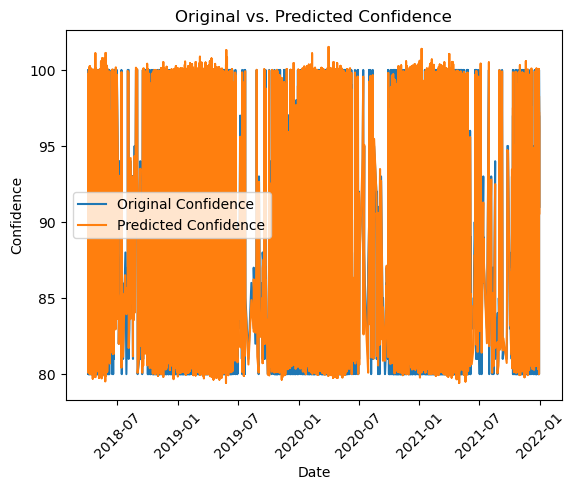

In [ ]:
import matplotlib.pyplot as plt
# new_data_f=new_data.copy()
# new_data_f.reset_index(drop=True, inplace=True)

# Assuming your DataFrame contains timestamp information
# Let's assume your DataFrame is named df_new and contains columns "acq_date", "confidence", and "predicted_confidence"

# Convert "acq_date" column to datetime if it's not already
new_data['acq_date'] = pd.to_datetime(new_data['acq_date'])

# Sort DataFrame by date
new_data.sort_values(by='acq_date', inplace=True)

# Plot original confidence values
plt.plot(new_data['acq_date'], new_data['confidence'], label='Original Confidence')

# Plot predicted confidence values
plt.plot(new_data['acq_date'], new_data['predicted_confidence'], label='Predicted Confidence')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Confidence')
plt.title('Original vs. Predicted Confidence')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


C:\Users\2248317\AppData\Local\Temp\ipykernel_5728\1520578979.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year.sort_values(by='acq_date', inplace=True)


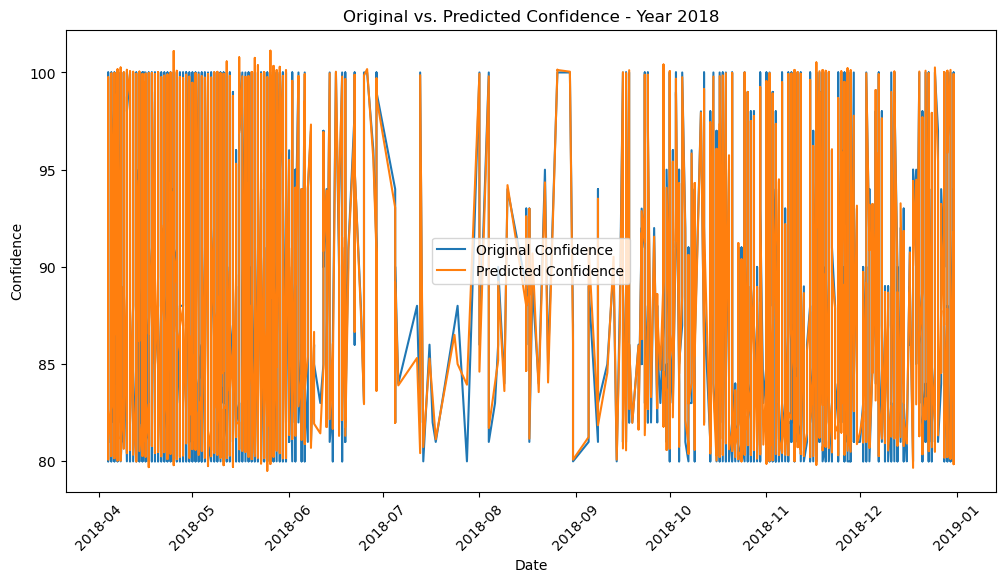

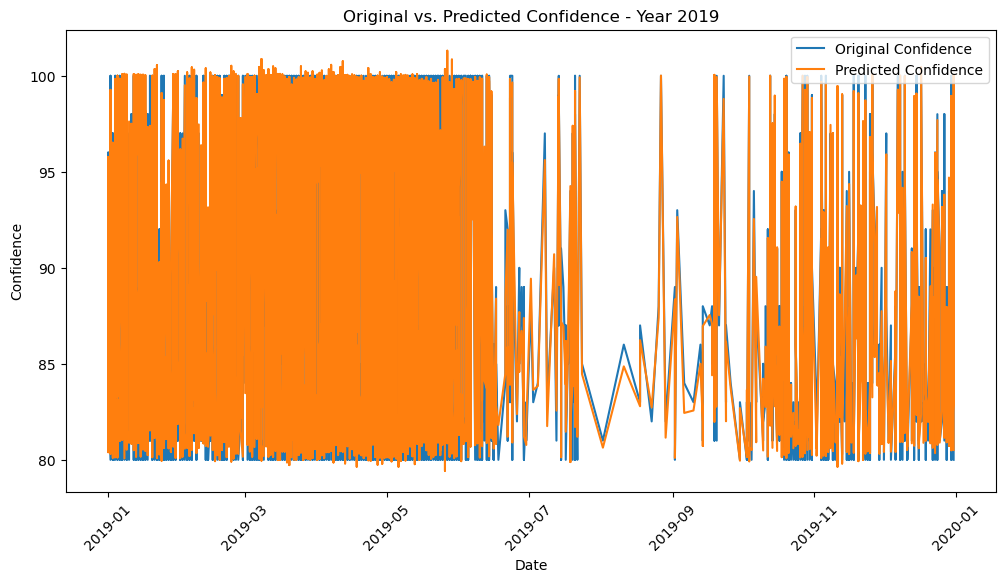

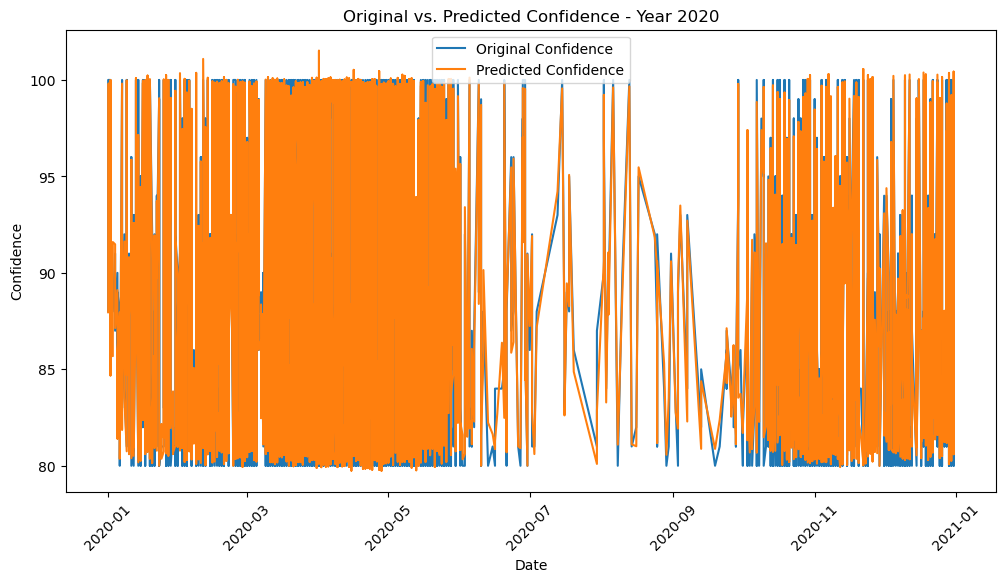

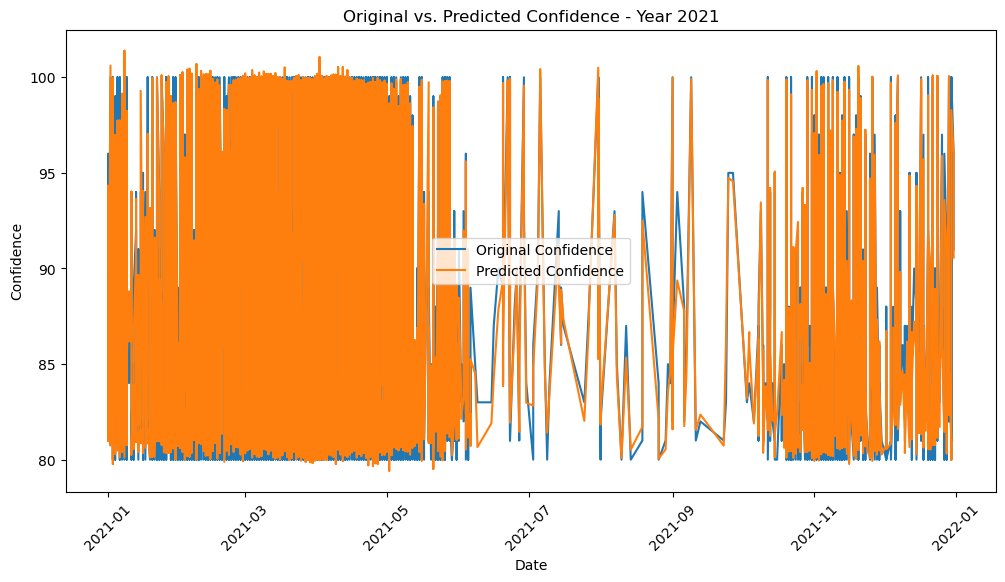

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame contains timestamp information
# Let's assume your DataFrame is named new_data and contains columns "acq_date", "confidence", and "predicted_confidence"

# Convert "acq_date" column to datetime if it's not already
new_data['acq_date'] = pd.to_datetime(new_data['acq_date'])

# Extract years from the 'acq_date' column
new_data['Year'] = new_data['acq_date'].dt.year

# Iterate over unique years
unique_years = new_data['Year'].unique()

for year in unique_years:
    # Filter data for the current year
    data_year = new_data[new_data['Year'] == year]

    # Sort data by date
    data_year.sort_values(by='acq_date', inplace=True)

    # Plot original confidence values
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    plt.plot(data_year['acq_date'], data_year['confidence'], label='Original Confidence')

    # Plot predicted confidence values
    plt.plot(data_year['acq_date'], data_year['predicted_confidence'], label='Predicted Confidence')

    # Set labels and title
    plt.xlabel('Date')
    plt.ylabel('Confidence')
    plt.title(f'Original vs. Predicted Confidence - Year {year}')
    plt.legend()

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show plot
    plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Splitting data into features and target
X = train_data.drop(columns=["confidence", "acq_date"])  # Excluding acq_date as it's not useful for modeling
y = train_data["confidence"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
# Define the XGBoost regressor
xgb_reg = XGBRegressor()

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Use the best model to make predictions
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Adjusted R-squared (assuming you have the number of predictors, p)
n = len(y_test) # number of samples
p = X_train.shape[1] # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)

# Calculate Explained Variance Score
explained_var_score = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_var_score)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}
Mean Squared Error: 2.333311002738349
Mean Absolute Error: 0.9116598350561161
Root Mean Squared Error: 1.5275179222314705
R-squared: 0.9475921271887701
Adjusted R-squared: 0.9475855331603162
Explained Variance Score: 0.9476814303085437


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Splitting data into features and target
X = train_data.drop(columns=["confidence", "acq_date"])  # Excluding acq_date as it's not useful for modeling
y = train_data["confidence"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
# Define the XGBoost regressor
xgb_reg = XGBRegressor()

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Use the best model to make predictions
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Adjusted R-squared (assuming you have the number of predictors, p)
n = len(y_test) # number of samples
p = X_train.shape[1] # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)

# Calculate Explained Variance Score
explained_var_score = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_var_score)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}
Mean Squared Error: 2.484615277567076
Mean Absolute Error: 0.905583330343898
Root Mean Squared Error: 1.5762662457741954
R-squared: 0.9443580925819961
Adjusted R-squared: 0.9443370841846825
Explained Variance Score: 0.9443695342851944


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Splitting data into features and target
X = train_data.drop(columns=["confidence", "acq_date"])  # Excluding acq_date as it's not useful for modeling
y = train_data["confidence"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)
# Define the XGBoost regressor
xgb_reg = XGBRegressor()

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Use the best model to make predictions
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Adjusted R-squared (assuming you have the number of predictors, p)
n = len(y_test) # number of samples
p = X_train.shape[1] # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)

# Calculate Explained Variance Score
explained_var_score = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_var_score)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}
Mean Squared Error: 2.403741499750091
Mean Absolute Error: 0.9126346868000275
Root Mean Squared Error: 1.5504004320658877
R-squared: 0.9465051890146718
Adjusted R-squared: 0.9465001410644657
Explained Variance Score: 0.9465061877956331


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Splitting data into features and target
X = train_data.drop(columns=["confidence", "acq_date"])  # Excluding acq_date as it's not useful for modeling
y = train_data["confidence"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)
# Define the XGBoost regressor
xgb_reg = XGBRegressor()

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Use the best model to make predictions
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Adjusted R-squared (assuming you have the number of predictors, p)
n = len(y_test) # number of samples
p = X_train.shape[1] # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r2)

# Calculate Explained Variance Score
explained_var_score = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_var_score)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}
Mean Squared Error: 2.439370297319442
Mean Absolute Error: 0.9368588420823897
Root Mean Squared Error: 1.5618483592588117
R-squared: 0.945246425697132
Adjusted R-squared: 0.9452422923813956
Explained Variance Score: 0.9453331757737522


In [ ]:
# train_data.head()

In [ ]:
# train_data['brightness_log'] = np.log(train_data['brightness'])
# train_data['frp_log'] = np.log(train_data['frp'])

In [ ]:
# train_data

#before

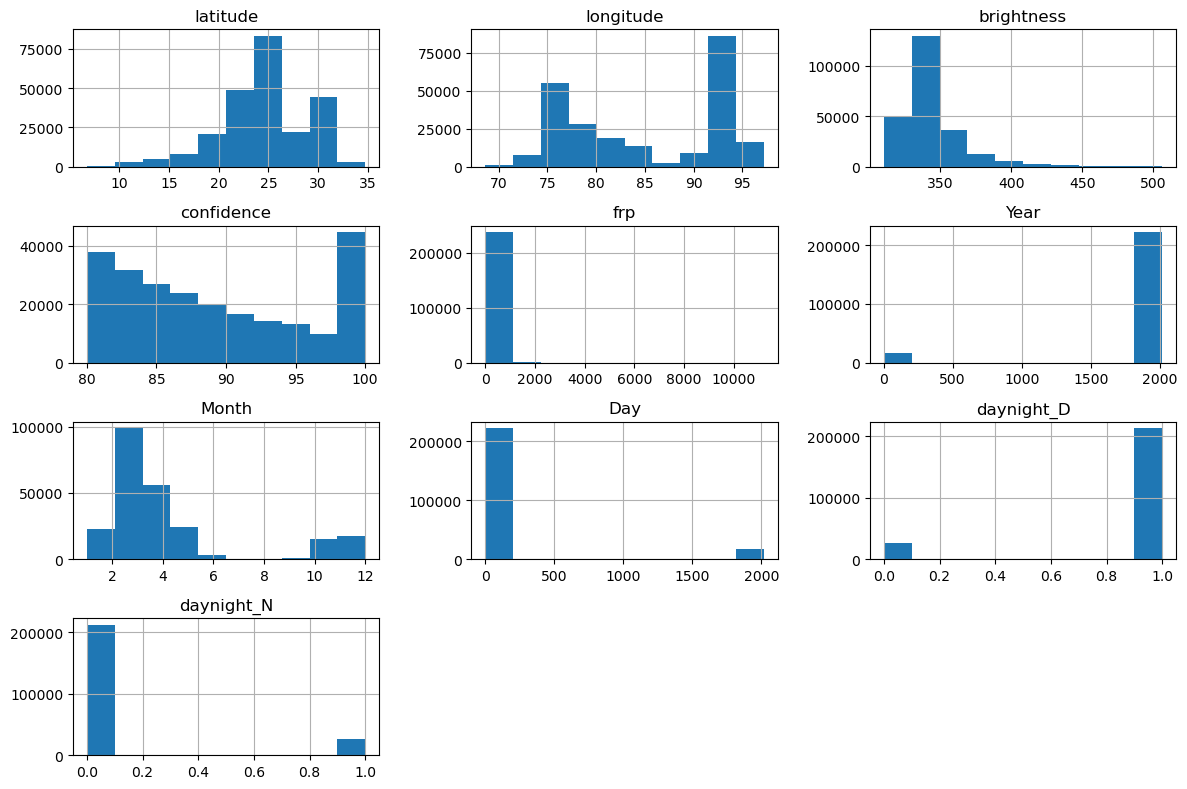

In [ ]:
train_data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# after

In [ ]:
# train_data.hist(figsize=(12, 8))
# plt.tight_layout()
# plt.show()

# Deep Learning Models

#### LSTM

In [1]:
pip install --upgrade tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikeras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [61]:
df_main

latitude  longitude  brightness    acq_date  confidence       frp  \
0        21.9012    72.7529   17.734148  2000-11-01          89  3.660601   
1        21.5099    72.8509   18.528357  2000-11-01         100  7.106335   
2        21.9102    72.7513   17.660691  2000-11-01          84  3.361547   
3        21.0788    79.7843   18.283873  2000-11-02          84  5.656854   
4        33.1521    76.3293   17.986106  2000-11-02          82  5.385165   
...          ...        ...         ...         ...         ...       ...   
298076   26.5447    95.0423   17.885749  2021-12-30          80  4.135215   
298077   17.8648    74.7937   18.102486  2021-12-30          82  4.969909   
298078   15.8202    76.9243   18.433665  2021-12-30          89  6.024948   
298079   16.6575    74.7251   17.826946  2021-12-31          96  4.959839   
298080   19.2353    76.9526   17.759504  2021-12-31          91  3.911521   

        Year  Month  Day  daynight_D  daynight_N  
0       2000     11    1           0           1  
1       2000     11    1           0           1  
2       2000     11    1           0           1  
3       2000     11    2           1           0  
4       2000     11    2           1           0  
...      ...    ...  ...         ...         ...  
298076  2021     12   30           1           0  
298077  2021     12   30           1           0  
298078  2021     12   30           1           0  
298079  2021     12   31           0           1  
298080  2021     12   31           0           1  

[298081 rows x 11 columns]

In [64]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from scikeras.wrappers import KerasRegressor
# from sklearn.model_selection import GridSearchCV


# # Separate features and target variable
# X = df_main[['latitude', 'longitude', 'brightness', 'frp', 'Year', 'Month', 'Day', 'daynight_D', 'daynight_N']]
# y = df_main['confidence']

# # Normalize features
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # Split dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Define the LSTM model
# def create_model(units=50, optimizer='adam'):
#     model = Sequential()
#     model.add(LSTM(units, input_shape=(X_train.shape[1], 1)))
#     model.add(Dense(1))
#     model.compile(loss='mean_squared_error', optimizer=optimizer)
#     return model

# # Convert DataFrame to numpy array and reshape
# X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# # Create KerasRegressor for GridSearchCV with default units
# model = KerasRegressor(build_fn=create_model, units=50, verbose=0)

# # Define hyperparameters to tune
# param_grid = {
#     'units': [50, 100],
#     'optimizer': ['adam', 'rmsprop']
# }

# # Perform GridSearchCV
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train_reshaped, y_train)

# # Get the best model
# best_model = grid_result.best_estimator_

# # Evaluate the model
# mse = best_model.score(X_test_reshaped, y_test)
# print("Mean Squared Error:", mse)


In [66]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# # Predictions
# y_pred = best_model.predict(X_test_reshaped)

# # Mean Absolute Error (MAE)
# mae = mean_absolute_error(y_test, y_pred)
# print("Mean Absolute Error (MAE):", mae)

# # Root Mean Squared Error (RMSE)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print("Root Mean Squared Error (RMSE):", rmse)

# # R-squared (R²)
# r2 = r2_score(y_test, y_pred)
# print("R-squared (R²):", r2)

# # Mean Absolute Percentage Error (MAPE)
# mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# print("Mean Absolute Percentage Error (MAPE):", mape)


In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Separate features and target variable
X = df_main[['latitude', 'longitude', 'brightness', 'frp', 'Year', 'Month', 'Day', 'daynight_D', 'daynight_N']]
y = df_main['confidence']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the input data for LSTM
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_reshaped, y_test))

# Evaluate the model
mse = model.evaluate(X_test_reshaped, y_test)
print("Mean Squared Error:", mse)


Epoch 1/50


C:\Users\2248317\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7452/7452 ━━━━━━━━━━━━━━━━━━━━ 7s 810us/step - loss: 2114.8662 - val_loss: 42.8410
Epoch 2/50
7452/7452 ━━━━━━━━━━━━━━━━━━━━ 6s 799us/step - loss: 19.0888 - val_loss: 8.1208
Epoch 3/50
7452/7452 ━━━━━━━━━━━━━━━━━━━━ 6s 779us/step - loss: 7.9034 - val_loss: 5.8970
Epoch 4/50
7452/7452 ━━━━━━━━━━━━━━━━━━━━ 6s 800us/step - loss: 5.3830 - val_loss: 4.3459
Epoch 5/50
7452/7452 ━━━━━━━━━━━━━━━━━━━━ 6s 794us/step - loss: 4.2870 - val_loss: 3.9162
Epoch 6/50
7452/7452 ━━━━━━━━━━━━━━━━━━━━ 6s 800us/step - loss: 3.9128 - val_loss: 3.6689
Epoch 7/50
7452/7452 ━━━━━━━━━━━━━━━━━━━━ 6s 790us/step - loss: 3.6755 - val_loss: 3.4737
Epoch 8/50
7452/7452 ━━━━━━━━━━━━━━━━━━━━ 6s 789us/step - loss: 3.4296 - val_loss: 3.3747
Epoch 9/50
7452/7452 ━━━━━━━━━━━━━━━━━━━━ 6s 808us/step - loss: 3.3852 - val_loss: 3.3025
Epoch 10/50
7452/7452 ━━━━━━━━━━━━━━━━━━━━ 6s 791us/step - loss: 3.3172 - val_loss: 3.2153
Epoch 11/50
7452/7452 ━━━━━━━━━━━━━━━━━━━━ 6s 797us/step - loss: 3.2451 - val_loss: 3.1832
Epoch 12/50
74

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test_reshaped).flatten()  # Flatten predictions

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)


1864/1864 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step
Mean Absolute Error (MAE): 0.9952494401498413
Root Mean Squared Error (RMSE): 1.6644270415297768
R-squared (R²): 0.9398984896556752
Mean Absolute Percentage Error (MAPE): 1.1448725430344653


In [69]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from sklearn.model_selection import train_test_split

# # Extract 'acq_date' and 'confidence' columns
# data = df_main[['acq_date', 'confidence']]

# # Normalize 'confidence' column
# scaler = MinMaxScaler()
# data['confidence'] = scaler.fit_transform(data[['confidence']])

# # Convert 'acq_date' to datetime
# data['acq_date'] = pd.to_datetime(data['acq_date'])

# # Create sequences for LSTM input
# def create_sequences(data, seq_length):
#     X, y = [], []
#     for i in range(len(data) - seq_length):
#         X.append(data.iloc[i:(i + seq_length)].values)
#         y.append(data.iloc[i + seq_length, 1])  # Target is 'confidence'
#     return np.array(X), np.array(y)

# # Define sequence length
# seq_length = 5

# # Create sequences
# X, y = create_sequences(data, seq_length)

# # Reshape X to fit LSTM input shape (samples, time steps, features)
# X = np.reshape(X, (X.shape[0], seq_length, X.shape[2]))

# # Split dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the LSTM model
# model = Sequential()
# model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

# # Train the model
# model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# # Evaluate the model
# mse = model.evaluate(X_test, y_test, verbose=0)
# print("Mean Squared Error:", mse)

# # Save the model
# model.save("lstm_model.h5")


### GRU

In [67]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-win_amd64.whl (938 kB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
Note: you may need to restart the kernel to use updated packages.


In [68]:
pip install --upgrade tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------- 376.9/376.9 MB 12.8 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 58.3 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 65.6 MB/s eta 0:00:00
  Using cached ml_dtypes-0.3.2-cp310-cp310-win_amd64.whl (127 kB)
     ---------------------------------------- 243.8/243.8 kB ? eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow-intel
    Found ex

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [69]:
pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [70]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import GRU, Dense
# from kerastuner.tuners import RandomSearch



# # Prepare features and target
# X = df_main[['latitude', 'longitude', 'brightness', 'frp', 'Year', 'Month', 'Day', 'daynight_D', 'daynight_N']]
# y = df_main['confidence']

# # Normalize features
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Define the model building function
# def build_model(hp):
#     model = Sequential()
#     model.add(GRU(units=hp.Int('units', min_value=32, max_value=256, step=32),input_shape=(X_train.shape[1], 1)))
#     model.add(Dense(1, activation='linear'))
#     model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),loss='mse',metrics=['mae'])
#     return model

# # Instantiate the tuner
# tuner = RandomSearch(
#     build_model,
#     objective='val_loss',
#     max_trials=5,  # Adjust the number of trials as needed
#     executions_per_trial=1,
#     directory='hyperparameter_tuning',
#     project_name='gru_tuning')

# # Perform hyperparameter tuning
# tuner.search(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train,
#              epochs=10,
#              validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test))

# # Get the best model
# best_model = tuner.get_best_models(num_models=1)[0]

# # Evaluate the best model
# loss, mae = best_model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test)
# print(f'Test MAE: {mae}')


In [71]:
pip install keras-tuner --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

# # Prepare features and target
# X = train_data[['latitude', 'longitude', 'brightness', 'frp', 'Year', 'Month', 'Day', 'daynight_D', 'daynight_N']]
# y = train_data['confidence']


# Splitting data into features and target
X = df_main.drop(columns=["confidence", "acq_date"])  # Excluding acq_date as it's not useful for modeling
y = df_main["confidence"]

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model building function
def build_model(hp):
    model = Sequential()
    model.add(GRU(units=hp.Int('units', min_value=32, max_value=256, step=32),
                  activation=hp.Choice('activation', values=['relu', 'tanh']),  # Adding activation choice
                  dropout=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1),  # Adding dropout
                  input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mse',
                  metrics=['mae'])
    return model

# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Increasing the number of trials
    directory='hyperparameter_tuning',
    project_name='gru_tuning')

# Perform hyperparameter tuning
tuner.search(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train,
             epochs=10,
             validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
loss, mae = best_model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test)
print(f'Test MAE: {mae}')


C:\Users\2248317\AppData\Local\Temp\ipykernel_10152\475236739.py:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch
C:\Users\2248317\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
256               |256               |units
relu              |relu              |activation
0.2               |0.2               |dropout
0.01              |0.01              |learning_rate


Epoch 1/10
7452/7452 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - loss: 743.3489 - mae: 8.9084 - val_loss: 32.7969 - val_mae: 4.4561
Epoch 2/10
7452/7452 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - loss: 20.5336 - mae: 3.3536 - val_loss: 38.2050 - val_mae: 4.9749
Epoch 3/10
7452/7452 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - loss: 14.6801 - mae: 2.6624 - val_loss: 70.3892 - val_mae: 7.2524
Epoch 4/10
7452/7452 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - loss: 13.5225 - mae: 2.4577 - val_loss: 84.0925 - val_mae: 8.1077
Epoch 5/10
7447/7452 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.8893 - mae: 2.3190

In the context of a GRU (Gated Recurrent Unit) for a regression problem, the choice of activation function primarily depends on the characteristics of your data and the specific requirements of your task. However, commonly used activation functions for GRUs in regression problems include:

1. **ReLU (Rectified Linear Unit)**: This activation function is widely used due to its simplicity and effectiveness. It introduces non-linearity while allowing faster training compared to sigmoid or tanh activations. However, it's not bounded, which might lead to exploding gradients in some cases.

2. **Tanh (Hyperbolic Tangent)**: Tanh is often used in recurrent neural networks, including GRUs, because it squashes the output to the range [-1, 1], which can help stabilize training. It's especially useful when the data is centered around zero.

3. **Sigmoid**: Sigmoid activation is commonly used for gating mechanisms in GRUs. It squashes the output between 0 and 1, making it suitable for gating operations where you want to control the flow of information. However, it suffers from the vanishing gradient problem.

4. **Identity (Linear)**: In some cases, especially when you want the GRU to directly output the regression value without any transformation, you might use the identity function (i.e., no activation) for the output gate. This allows the GRU to directly output real-valued predictions.

It's recommended to experiment with different activation functions and see which one performs best on your specific regression task. Cross-validation or other evaluation techniques can help you determine the optimal architecture for your problem.

In [ ]:
# Evaluate the best model
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = best_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Test MAE: {mae}')
print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')

1491/1491 [==============================] - 10s 6ms/step
Test MAE: 5.237478810397687
Test MSE: 36.93373374752475
Test RMSE: 6.077313036821844


replace test_data with df.main 

In [ ]:
# # Prepare features and target
# X = test_data[['latitude', 'longitude', 'brightness', 'frp', 'Year', 'Month', 'Day', 'daynight_D', 'daynight_N']]

# Splitting data into features and target
X = df_main.drop(columns=["confidence", "acq_date"])  # Excluding acq_date as it's not useful for modeling

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# X_scaled = test_data.drop(columns=["acq_date","confidence"])

# Reshape the data to fit the input shape of the model
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Predict confidence values using the best model
predicted_confidence = best_model.predict(X_scaled)

new_data=test_data.copy()
# Add the predicted confidence values to the new DataFrame
new_data["predicted_confidence_gru"] = predicted_confidence

# Print or use the new DataFrame with predicted confidence values
new_data

7452/7452 [==============================] - 45s 6ms/step


ValueError: Length of values (238464) does not match length of index (59617)

In [ ]:
# # X_new = test_data.drop(columns=["acq_date","confidence"])

# # Reshape the data to fit the input shape of the model
# X_new = X_new.values.reshape((X_new.shape[0], X_new.shape[1], 1))

# # Predict confidence values using the best model
# predicted_confidence = best_model.predict(X_new)

# new_data=test_data
# # Add the predicted confidence values to the new DataFrame
# new_data["predicted_confidence"] = predicted_confidence

# # Print or use the new DataFrame with predicted confidence values
# new_data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from kerastuner.tuners import RandomSearch

# # Prepare features and target
# X = train_data[['latitude', 'longitude', 'brightness', 'frp', 'Year', 'Month', 'Day', 'daynight_D', 'daynight_N']]
# y = train_data['confidence']


# Splitting data into features and target
X = df_main.drop(columns=["confidence", "acq_date"])  # Excluding acq_date as it's not useful for modeling
y = df_main["confidence"]

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,shuffle=False)

# Define the model building function
def build_model(hp):
    model = Sequential()
    model.add(GRU(units=hp.Int('units', min_value=32, max_value=256, step=32),
                  activation=hp.Choice('activation', values=['relu', 'tanh']),  # Adding activation choice
                  dropout=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1),  # Adding dropout
                  input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),
                  loss='mse',
                  metrics=['mae'])
    return model

# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Increasing the number of trials
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='gru_tuning')

# Perform hyperparameter tuning
tuner.search(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train,
             epochs=10,
             validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
loss, mae = best_model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test)
print(f'Test MAE: {mae}')


Reloading Tuner from hyperparameter_tuning\gru_tuning\tuner0.json
1491/1491 [==============================] - 10s 7ms/step - loss: 36.5102 - mae: 5.1443
Test MAE: 5.144270896911621


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from kerastuner.tuners import RandomSearch

# # Prepare features and target
# X = train_data[['latitude', 'longitude', 'brightness', 'frp', 'Year', 'Month', 'Day', 'daynight_D', 'daynight_N']]
# y = train_data['confidence']

# Splitting data into features and target
X = df_main.drop(columns=["confidence", "acq_date"])  # Excluding acq_date as it's not useful for modeling
y = df_main["confidence"]

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42,shuffle=False)

# Define the model building function
def build_model(hp):
    model = Sequential()
    model.add(GRU(units=hp.Int('units', min_value=32, max_value=256, step=32),
                  activation=hp.Choice('activation', values=['relu', 'tanh']),  # Adding activation choice
                  dropout=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1),  # Adding dropout
                  input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),
                  loss='mse',
                  metrics=['mae'])
    return model

# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Increasing the number of trials
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='gru_tuning')

# Perform hyperparameter tuning
tuner.search(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train,
             epochs=10,
             validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test))

# Get the best model
best_model_7 = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
loss, mae = best_model_7.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test)
print(f'Test MAE: {mae}')


Reloading Tuner from hyperparameter_tuning\gru_tuning\tuner0.json
2236/2236 [==============================] - 15s 7ms/step - loss: 36.1838 - mae: 5.1438
Test MAE: 5.143804550170898


In [ ]:
# Evaluate the best model
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = best_model_7.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Test MAE: {mae}')
print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')
# # Prepare features and target
# X = test_data[['latitude', 'longitude', 'brightness', 'frp', 'Year', 'Month', 'Day', 'daynight_D', 'daynight_N']]

# Splitting data into features and target
X = df_main.drop(columns=["confidence", "acq_date"])  # Excluding acq_date as it's not useful for modeling

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled = test_data.drop(columns=["acq_date","confidence"])

# Reshape the data to fit the input shape of the model
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Predict confidence values using the best model
predicted_confidence = best_model_7.predict(X_scaled)

new_gru=test_data.copy()
# Add the predicted confidence values to the new DataFrame
new_gru["predicted_confidence_gru"] = predicted_confidence

# Print or use the new DataFrame with predicted confidence values
new_gru

2236/2236 [==============================] - 15s 7ms/step
Test MAE: 5.1437980212477425
Test MSE: 36.18380835321922
Test RMSE: 6.015297860723043
1864/1864 [==============================] - 12s 6ms/step


latitude  longitude  brightness    acq_date  confidence       frp  \
238464   27.2998    93.5144    0.085714  2018-04-04          81  0.002007   
238465   23.6823    91.9912    0.242857  2018-04-04          99  0.018908   
238466   25.0484    93.9901    0.144388  2018-04-04          90  0.002997   
238467   24.2749    92.9018    0.180102  2018-04-04          93  0.004540   
238468   23.6843    92.0113    0.133163  2018-04-04          87  0.007831   
...          ...        ...         ...         ...         ...       ...   
298076   26.5447    95.0423    0.049490  2021-12-30          80  0.001525   
298077   17.8648    74.7937    0.089286  2021-12-30          82  0.002203   
298078   15.8202    76.9243    0.151020  2021-12-30          89  0.003238   
298079   16.6575    74.7251    0.038776  2021-12-31          96  0.002194   
298080   19.2353    76.9526    0.026531  2021-12-31          91  0.001365   

        Year  Month  Day  daynight_D  daynight_N  predicted_confidence_gru  
238464  2018      4    4           1           0                 87.701736  
238465  2018      4    4           1           0                 88.726151  
238466  2018      4    4           1           0                 87.980812  
238467  2018      4    4           1           0                 88.091988  
238468  2018      4    4           1           0                 87.679489  
...      ...    ...  ...         ...         ...                       ...  
298076  2021     12   30           1           0                 87.588867  
298077  2021     12   30           1           0                 86.275040  
298078  2021     12   30           1           0                 86.414307  
298079  2021     12   31           0           1                 86.934608  
298080  2021     12   31           0           1                 86.975044  

[59617 rows x 12 columns]

C:\Users\Raj Bhardwaj\AppData\Local\Temp\ipykernel_5084\2981098552.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year.sort_values(by='acq_date', inplace=True)


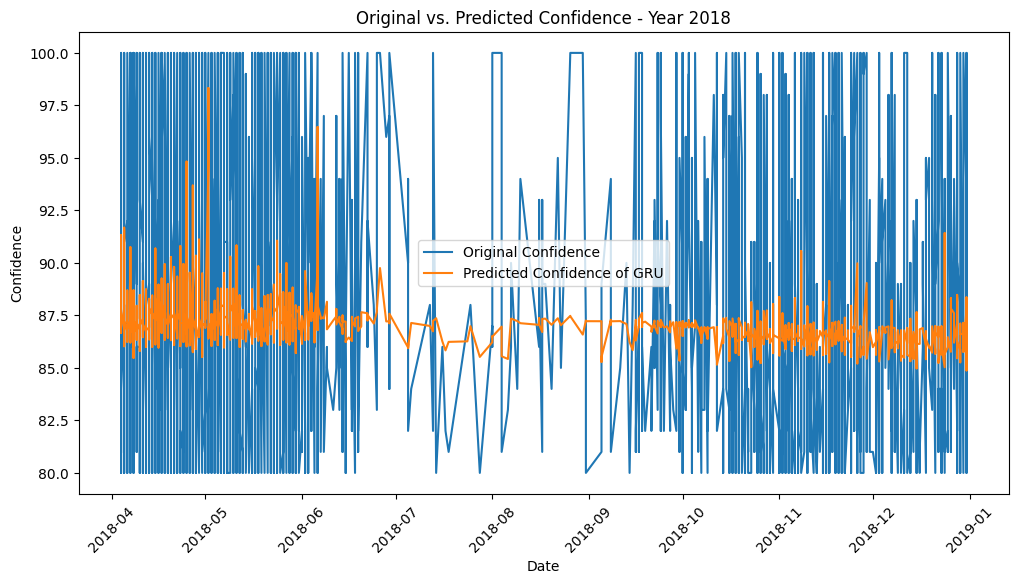

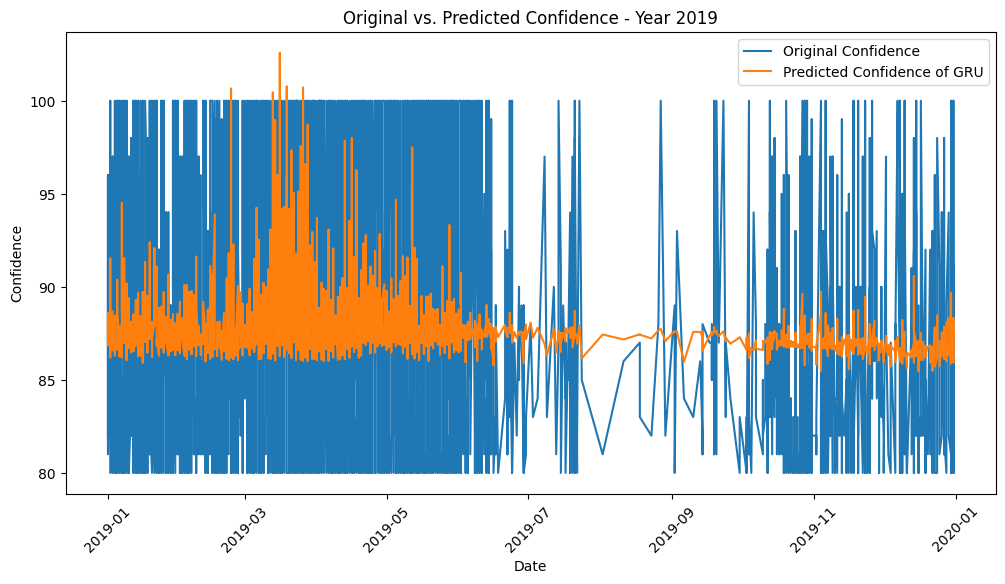

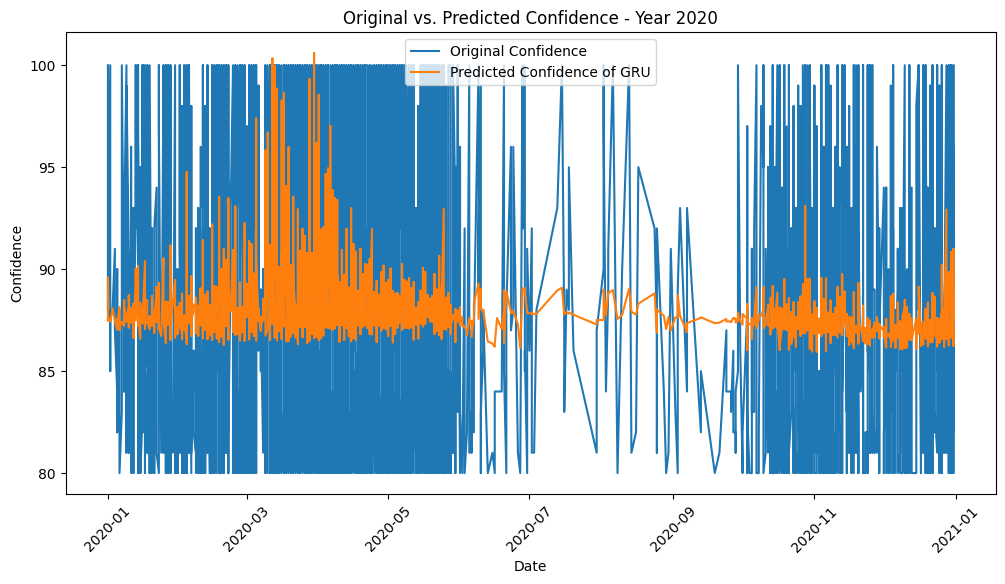

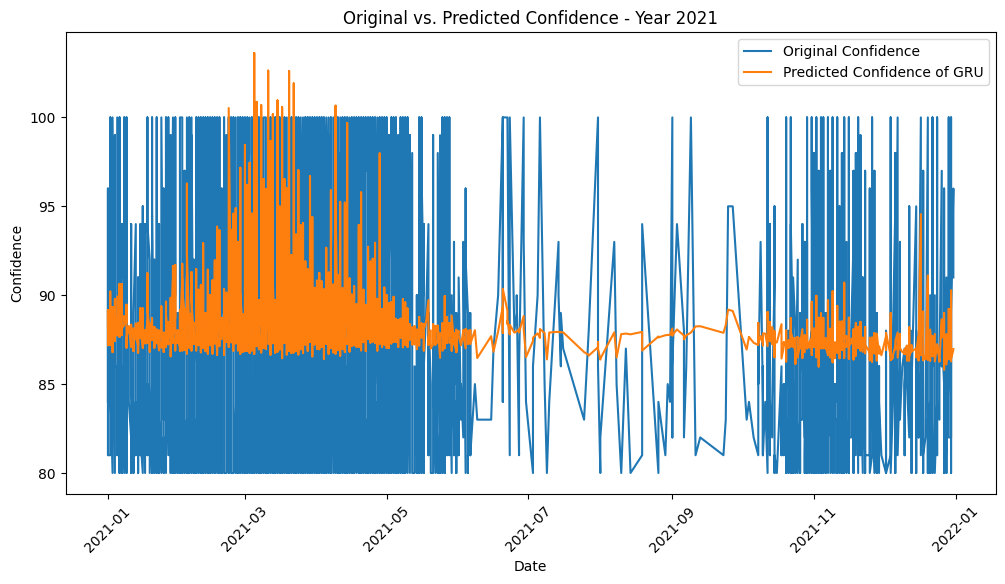

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame contains timestamp information
# Let's assume your DataFrame is named new_gru and contains columns "acq_date", "confidence", and "predicted_confidence"

# Convert "acq_date" column to datetime if it's not already
new_gru['acq_date'] = pd.to_datetime(new_gru['acq_date'])

# Extract years from the 'acq_date' column
new_gru['Year'] = new_gru['acq_date'].dt.year

# Iterate over unique years
unique_years = new_gru['Year'].unique()

for year in unique_years:
    # Filter data for the current year
    data_year = new_gru[new_gru['Year'] == year]

    # Sort data by date
    data_year.sort_values(by='acq_date', inplace=True)

    # Plot original confidence values
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    plt.plot(data_year['acq_date'], data_year['confidence'], label='Original Confidence')

    # Plot predicted confidence values
    plt.plot(data_year['acq_date'], data_year['predicted_confidence_gru'], label='Predicted Confidence of GRU')

    # Set labels and title
    plt.xlabel('Date')
    plt.ylabel('Confidence')
    plt.title(f'Original vs. Predicted Confidence - Year {year}')
    plt.legend()

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show plot
    plt.show()


In [205]:
df_main

latitude  longitude  brightness    acq_date  confidence       frp  \
0        21.9012    72.7529    0.148117  2000-11-01          89  0.034571   
1        21.5099    72.8509    0.410947  2000-11-01         100  0.067113   
2        21.9102    72.7513    0.093131  2000-11-01          84  0.031747   
3        21.0788    79.7843    0.350655  2000-11-02          84  0.053424   
4        33.1521    76.3293    0.260494  2000-11-02          82  0.050858   
...          ...        ...         ...         ...         ...       ...   
298076   26.5447    95.0423    0.222463  2021-12-30          80  0.039053   
298077   17.8648    74.7937    0.298807  2021-12-30          82  0.046936   
298078   15.8202    76.9243    0.388613  2021-12-30          89  0.056900   
298079   16.6575    74.7251    0.196915  2021-12-31          96  0.046841   
298080   19.2353    76.9526    0.162882  2021-12-31          91  0.036941   

        Year  Month  Day  daynight_D  daynight_N  
0       2000     11    1           0           1  
1       2000     11    1           0           1  
2       2000     11    1           0           1  
3       2000     11    2           1           0  
4       2000     11    2           1           0  
...      ...    ...  ...         ...         ...  
298076  2021     12   30           1           0  
298077  2021     12   30           1           0  
298078  2021     12   30           1           0  
298079  2021     12   31           0           1  
298080  2021     12   31           0           1  

[298081 rows x 11 columns]

# GRU Final Start

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from kerastuner.tuners import RandomSearch

# Prepare features and target
X = df_main[['latitude', 'longitude', 'brightness', 'frp', 'Year', 'Month', 'Day', 'daynight_D', 'daynight_N']]
y = df_main['confidence']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, shuffle=False)

# Define the model building function
def build_model(hp):
    model = Sequential()
    model.add(GRU(units=hp.Int('units', min_value=64, max_value=256, step=64),
                  activation=hp.Choice('activation', values=['relu', 'tanh']),
                  dropout=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1),
                  return_sequences=True,  # Return sequences to add more GRU layers
                  input_shape=(X_train.shape[1], 1)))
    model.add(GRU(units=hp.Int('units', min_value=64, max_value=256, step=64),
                  activation=hp.Choice('activation', values=['relu', 'tanh']),
                  dropout=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(32, activation='relu'))  # Additional dense layer
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-3, 1e-4])),
                  loss='mse',
                  metrics=['mae'])
    return model

# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Increasing the number of trials
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='gru_tuning')

# Perform hyperparameter tuning
tuner.search(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train,
             epochs=20,  # Increase number of epochs
             validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test))

# Get the best model
best_gru = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
loss, mae = best_gru.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test)
print(f'Test MAE: {mae}')


Trial 10 Complete [00h 26m 47s]
val_loss: 20.063142776489258

Best val_loss So Far: 2.793487071990967
Total elapsed time: 3d 02h 04m 58s


C:\Users\2248317\AppData\Roaming\Python\Python310\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


2795/2795 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 3.1093 - mae: 1.0582
Test MAE: 0.9866864085197449


In [71]:
# Evaluate the best model
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = best_gru.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Test MAE: {mae}')
print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')
# # Prepare features and target
# X = test_data[['latitude', 'longitude', 'brightness', 'frp', 'Year', 'Month', 'Day', 'daynight_D', 'daynight_N']]

# # Normalize features
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)
# # X_scaled = test_data.drop(columns=["acq_date","confidence"])

# # Reshape the data to fit the input shape of the model
# X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# # Predict confidence values using the best model
# predicted_confidence = best_model.predict(X_scaled)

# new_gru2=test_data.copy()
# # Add the predicted confidence values to the new DataFrame
# new_gru2["predicted_confidence_gru"] = predicted_confidence

# # Print or use the new DataFrame with predicted confidence values
# new_gru2

2795/2795 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step
Test MAE: 0.9866849792326899
Test MSE: 2.7938226918429274
Test RMSE: 1.6714732100284848


In [ ]:
import pickle
# Save the trained model to a pickle file
with open('best_gru_p.pkl', 'wb') as file:
    pickle.dump(best_gru, file)

# Load the saved model from the pickle file
with open('best_gru_p.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# # Use the loaded model to make predictions
# y_pred = loaded_model.predict(X_test)

# # Print the predictions
# print(y_pred)

In [ ]:
# Export combined DataFrame to a single CSV file
df_main.to_csv('df_main.csv', index=False)

C:\Users\Raj Bhardwaj\AppData\Local\Temp\ipykernel_5084\2757243742.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year.sort_values(by='acq_date', inplace=True)


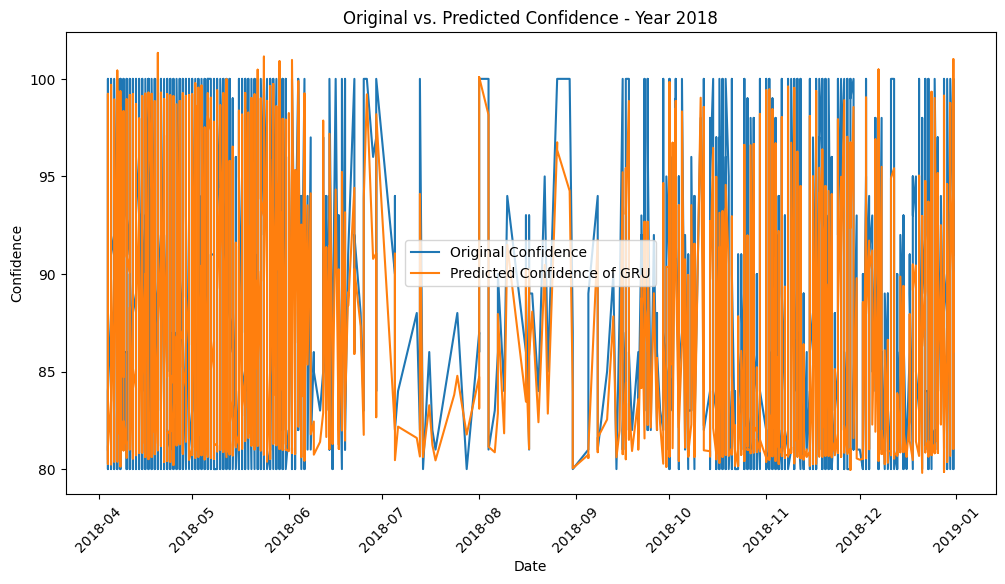

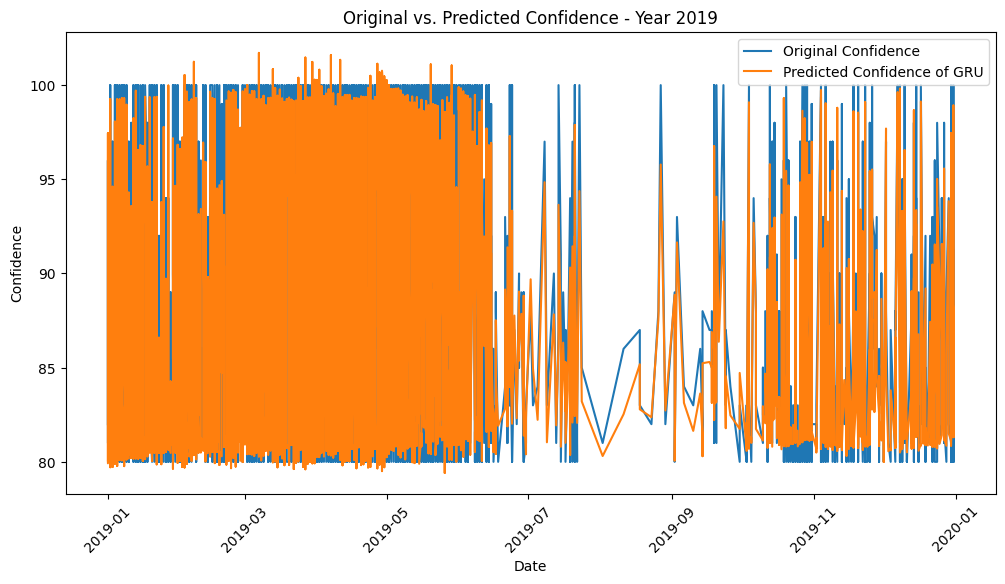

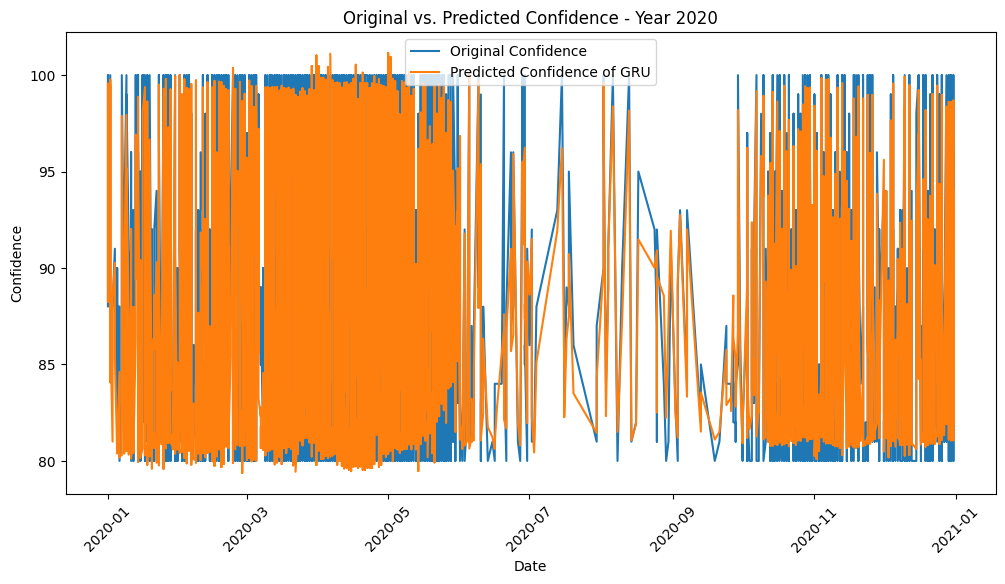

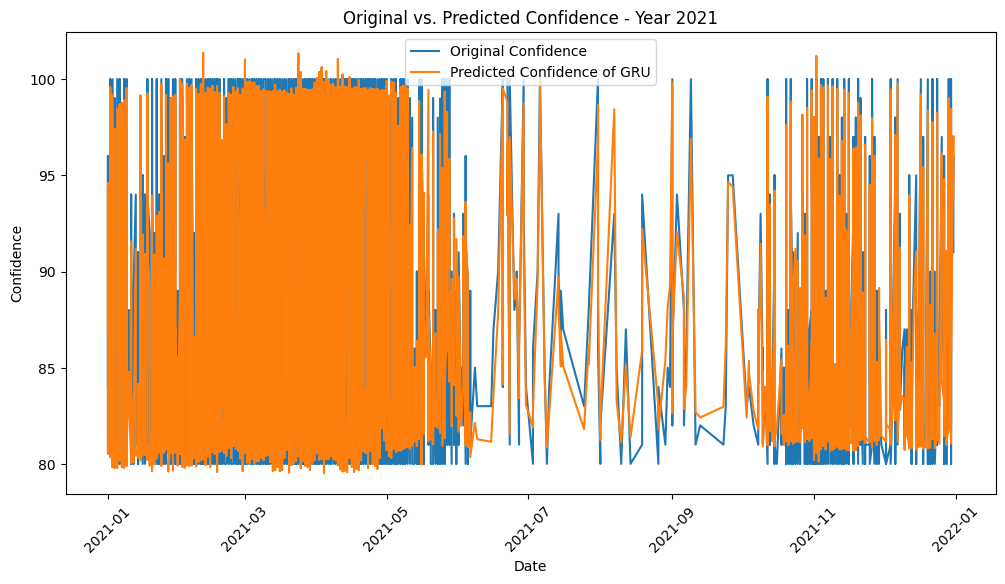

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame contains timestamp information
# Let's assume your DataFrame is named new_gru2 and contains columns "acq_date", "confidence", and "predicted_confidence"

# Convert "acq_date" column to datetime if it's not already
new_gru2['acq_date'] = pd.to_datetime(new_gru2['acq_date'])

# Extract years from the 'acq_date' column
new_gru2['Year'] = new_gru2['acq_date'].dt.year

# Iterate over unique years
unique_years = new_gru2['Year'].unique()

for year in unique_years:
    # Filter data for the current year
    data_year = new_gru2[new_gru2['Year'] == year]

    # Sort data by date
    data_year.sort_values(by='acq_date', inplace=True)

    # Plot original confidence values
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    plt.plot(data_year['acq_date'], data_year['confidence'], label='Original Confidence')

    # Plot predicted confidence values
    plt.plot(data_year['acq_date'], data_year['predicted_confidence_gru'], label='Predicted Confidence of GRU')

    # Set labels and title
    plt.xlabel('Date')
    plt.ylabel('Confidence')
    plt.title(f'Original vs. Predicted Confidence - Year {year}')
    plt.legend()

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show plot
    plt.show()


# GRU Final End

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from kerastuner.tuners import RandomSearch

# Prepare features and target
X = train_data[['latitude', 'longitude', 'brightness', 'frp', 'Year', 'Month', 'Day', 'daynight_D', 'daynight_N']]
y = train_data['confidence']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42,shuffle=False)

# Define the model building function
def build_model(hp):
    model = Sequential()
    model.add(GRU(units=hp.Int('units', min_value=32, max_value=256, step=32),
                  activation=hp.Choice('activation', values=['relu', 'tanh']),  # Adding activation choice
                  dropout=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1),  # Adding dropout
                  input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),
                  loss='mse',
                  metrics=['mae'])
    return model

# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Increasing the number of trials
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='gru_tuning')

# Perform hyperparameter tuning
tuner.search(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train,
             epochs=10,
             validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
loss, mae = best_model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test)
print(f'Test MAE: {mae}')


Reloading Tuner from hyperparameter_tuning\gru_tuning\tuner0.json
2981/2981 [==============================] - 20s 7ms/step - loss: 36.4427 - mae: 5.1724
Test MAE: 5.172406196594238


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from kerastuner.tuners import RandomSearch

# Prepare features and target
X = train_data[['latitude', 'longitude', 'brightness', 'frp', 'Year', 'Month', 'Day', 'daynight_D', 'daynight_N']]
y = train_data['confidence']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42,shuffle=False)

# Define the model building function
def build_model(hp):
    model = Sequential()
    model.add(GRU(units=hp.Int('units', min_value=32, max_value=256, step=32),
                  activation=hp.Choice('activation', values=['relu', 'tanh']),  # Adding activation choice
                  dropout=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1),  # Adding dropout
                  input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),
                  loss='mse',
                  metrics=['mae'])
    return model

# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Increasing the number of trials
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='gru_tuning')

# Perform hyperparameter tuning
tuner.search(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train,
             epochs=10,
             validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
loss, mae = best_model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test)
print(f'Test MAE: {mae}')


Reloading Tuner from hyperparameter_tuning\gru_tuning\tuner0.json
3726/3726 [==============================] - 24s 6ms/step - loss: 36.1889 - mae: 5.1558
Test MAE: 5.155816078186035


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from scikeras.wrappers import KerasRegressor
# from sklearn.model_selection import GridSearchCV



# # Convert 'acq_date' to datetime
# train_data['acq_date'] = pd.to_datetime(train_data['acq_date'])


# # Split train_data into X and y
# X = train_data[['latitude', 'longitude', 'brightness', 'frp', 'Year', 'Month', 'Day', 'daynight_D', 'daynight_N']]
# y = train_data['confidence']

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Reshape input features for LSTM
# X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
# X_test = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# # Define LSTM model
# def create_model(units=50):
#     model = Sequential()
#     model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(LSTM(units=units))
#     model.add(Dense(units=1))
#     model.compile(optimizer='adam', loss='mse')
#     return model

# # Create KerasRegressor
# model = KerasRegressor(build_fn=create_model, verbose=0)

# # Define hyperparameters to tune
# param_grid = {
#     'units': [50, 100, 150],
#     'batch_size': [32, 64, 128],
#     'epochs': [50, 100, 150]
# }

# # Grid search
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# grid_result = grid.fit(X_train, y_train)

# # Summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

# # Evaluate best model
# best_model = grid.best_estimator_
# test_loss = best_model.score(X_test, y_test)
# print("Test Loss:", test_loss)


# 14-03

In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Read the test.xlsx file
df_test = pd.read_excel('test.xlsx')

# Create a list of dates for 365 days
start_date = datetime(2021, 1, 1)
end_date = start_date + timedelta(days=364)
date_range = pd.date_range(start_date, end_date, freq='D')

# Create an empty list to store the processed dataframes
result_dfs = []

# Loop through each date
for date in date_range:
    # Create a copy of the test DataFrame for each date
    df_copy = df_test.copy()

    # Create a new column for the date
    df_copy['date'] = date.strftime('%m/%d/%y')

    # Append the processed dataframe to the list
    result_dfs.append(df_copy)

# Concatenate all the processed dataframes
result_df = pd.concat(result_dfs, ignore_index=True)

# Save the result to a new Excel file
result_df.to_excel('result.xlsx', index=False)

In [ ]:
import pickle
# Load the saved model from the pickle file
with open('best_xgb_p.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
# Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)

# Print the predictions
y_pred